### Bibliotecas necessárias

In [118]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.stats import mode
from sklearn.ensemble import VotingClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

### Leitura dos dados

In [119]:
dataset = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Análise exploratória inicial dos dados

In [120]:
dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [122]:

# removendo as linhas com dados faltantes
dataset = dataset.dropna()

### Pré-Processamento

In [123]:
# dropando colunas nao usada id e unnamed
dataset.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
dataset_test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [124]:
labels = list(dataset.columns[2:])
labels.remove('Flight Distance')
labels.remove('Arrival Delay in Minutes')
labels.remove('Departure Delay in Minutes')

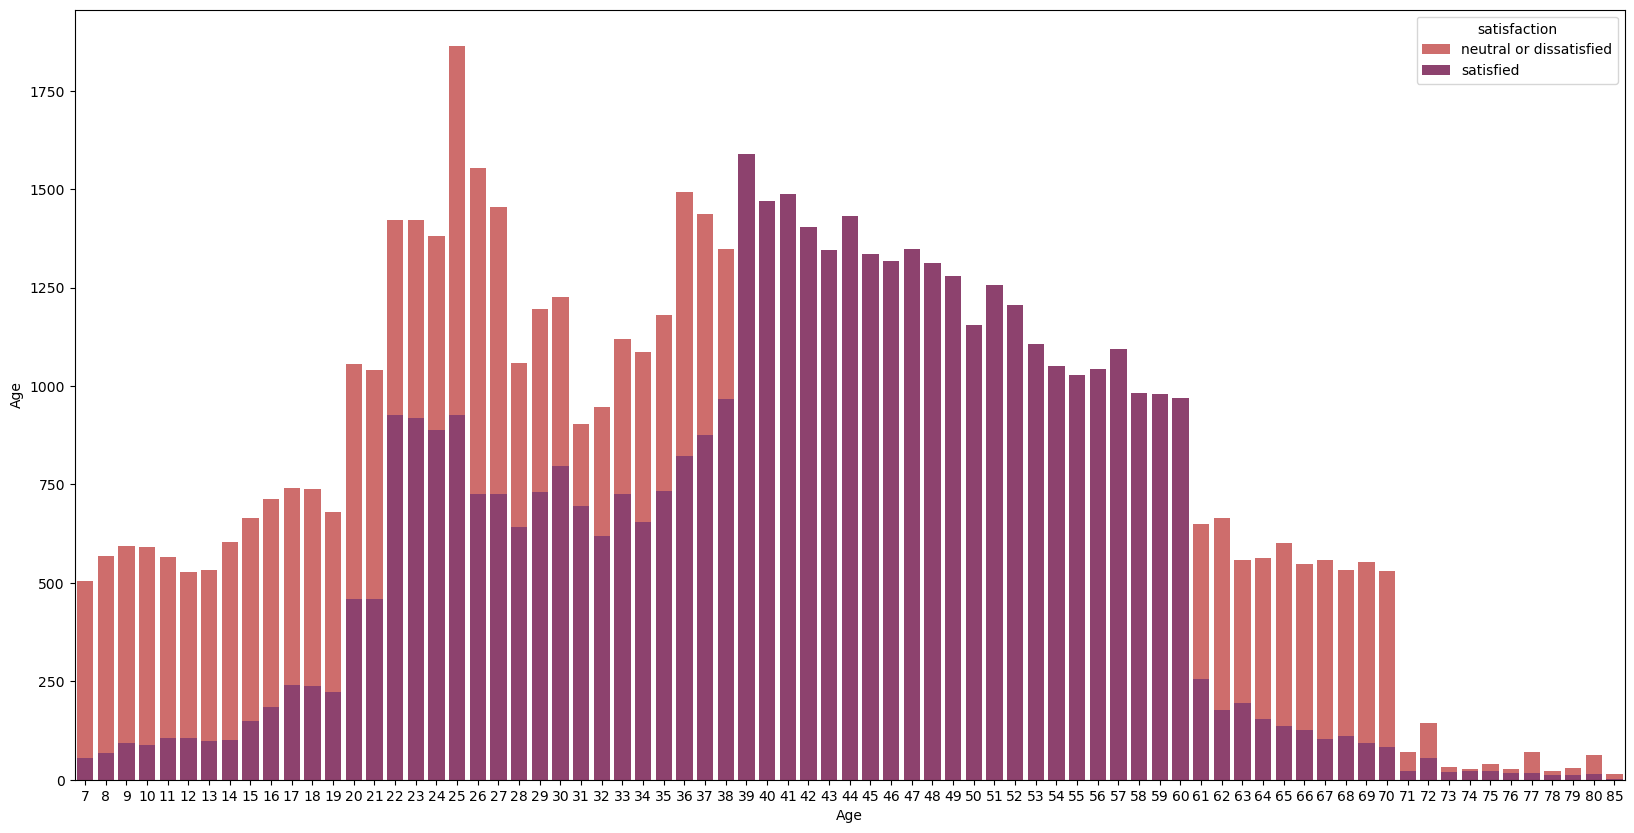

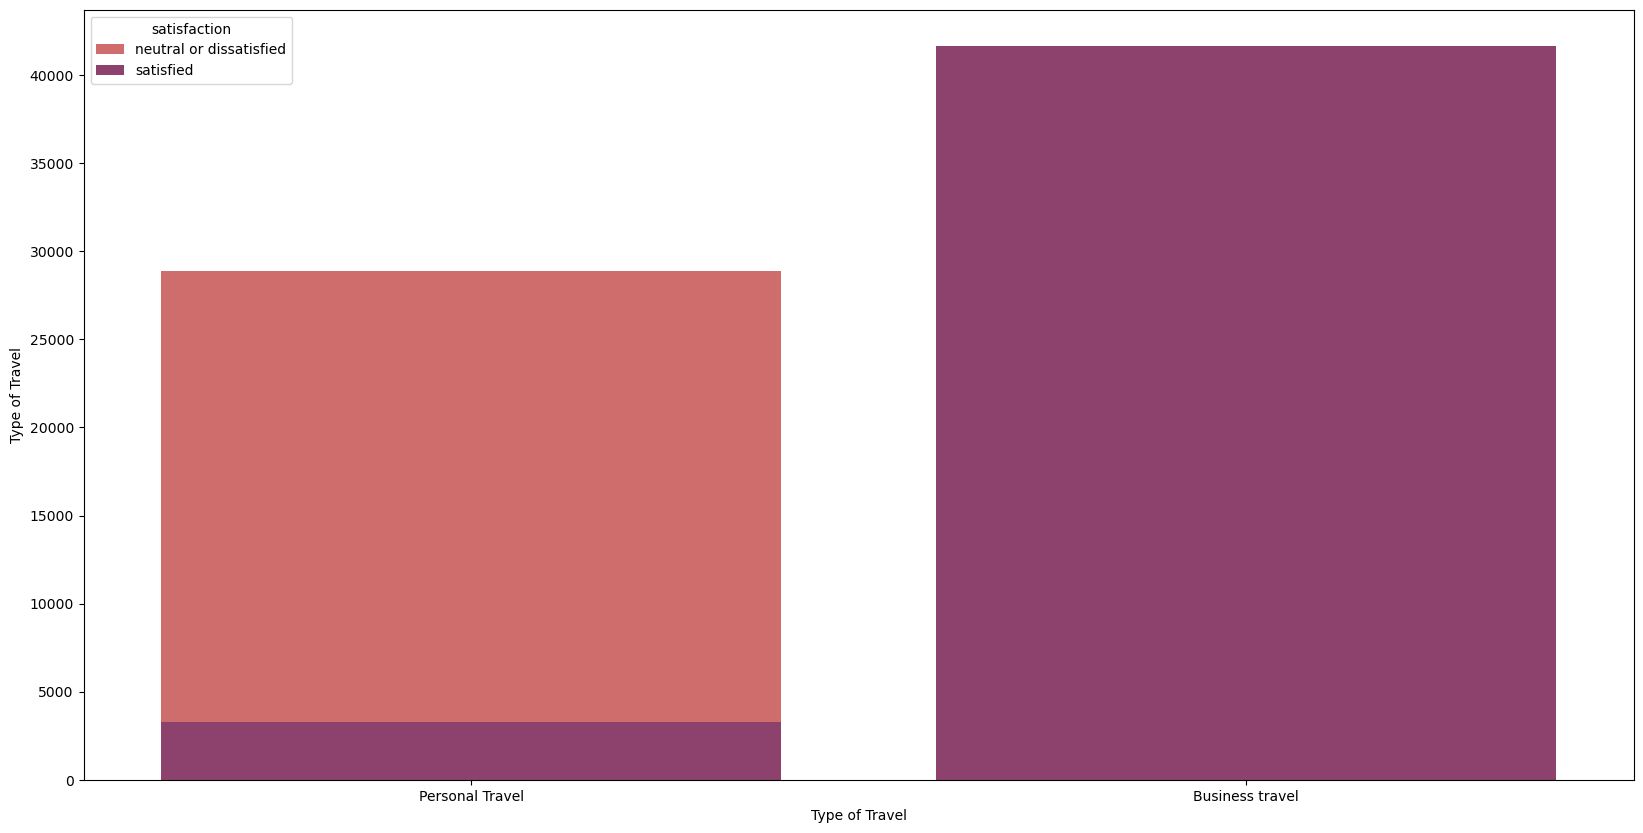

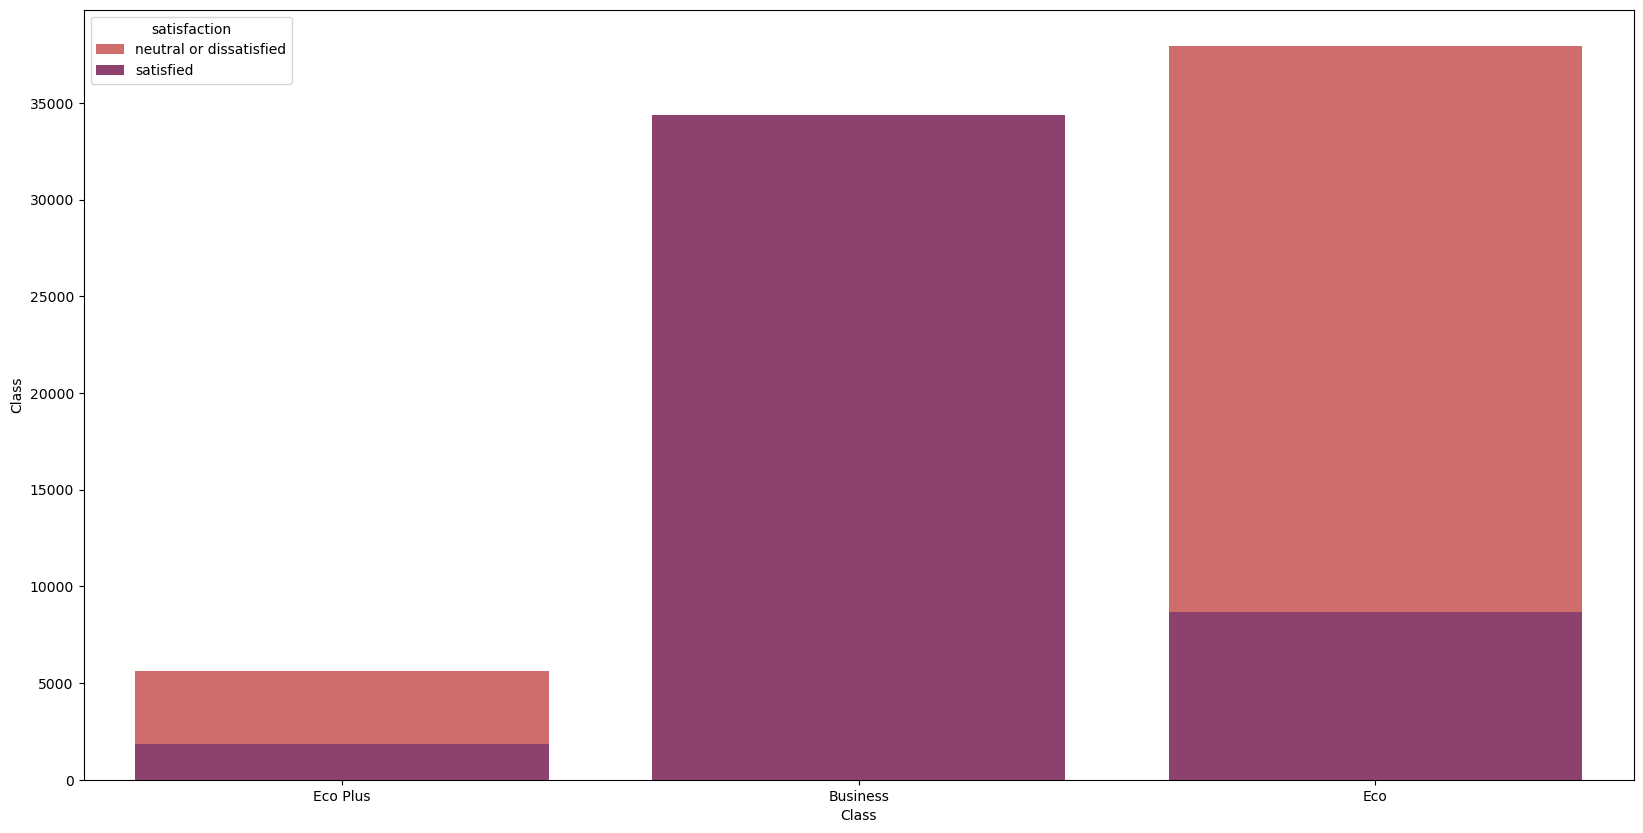

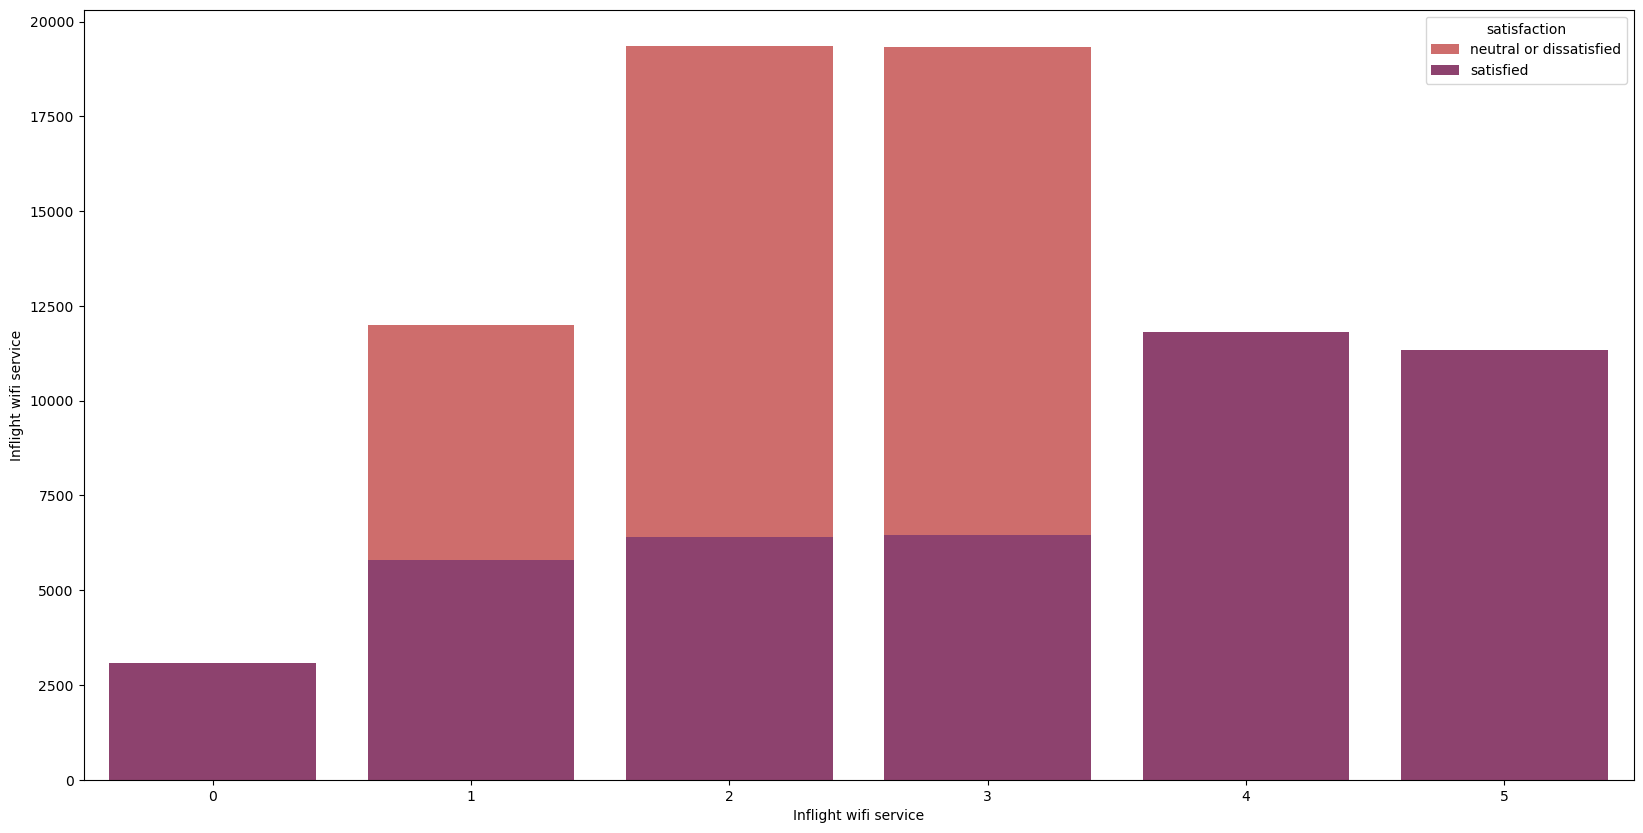

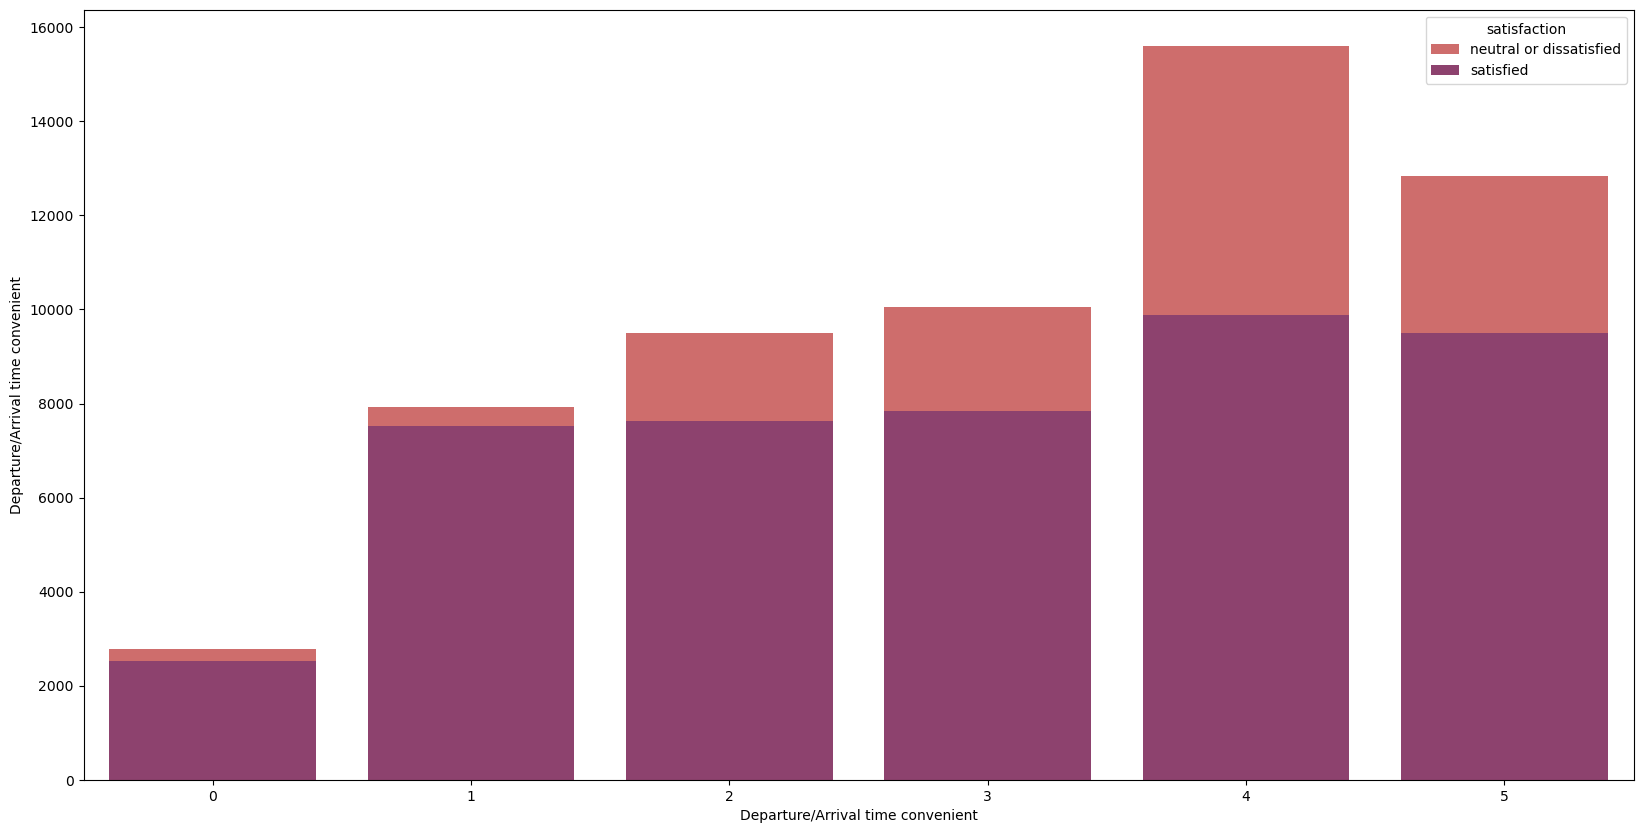

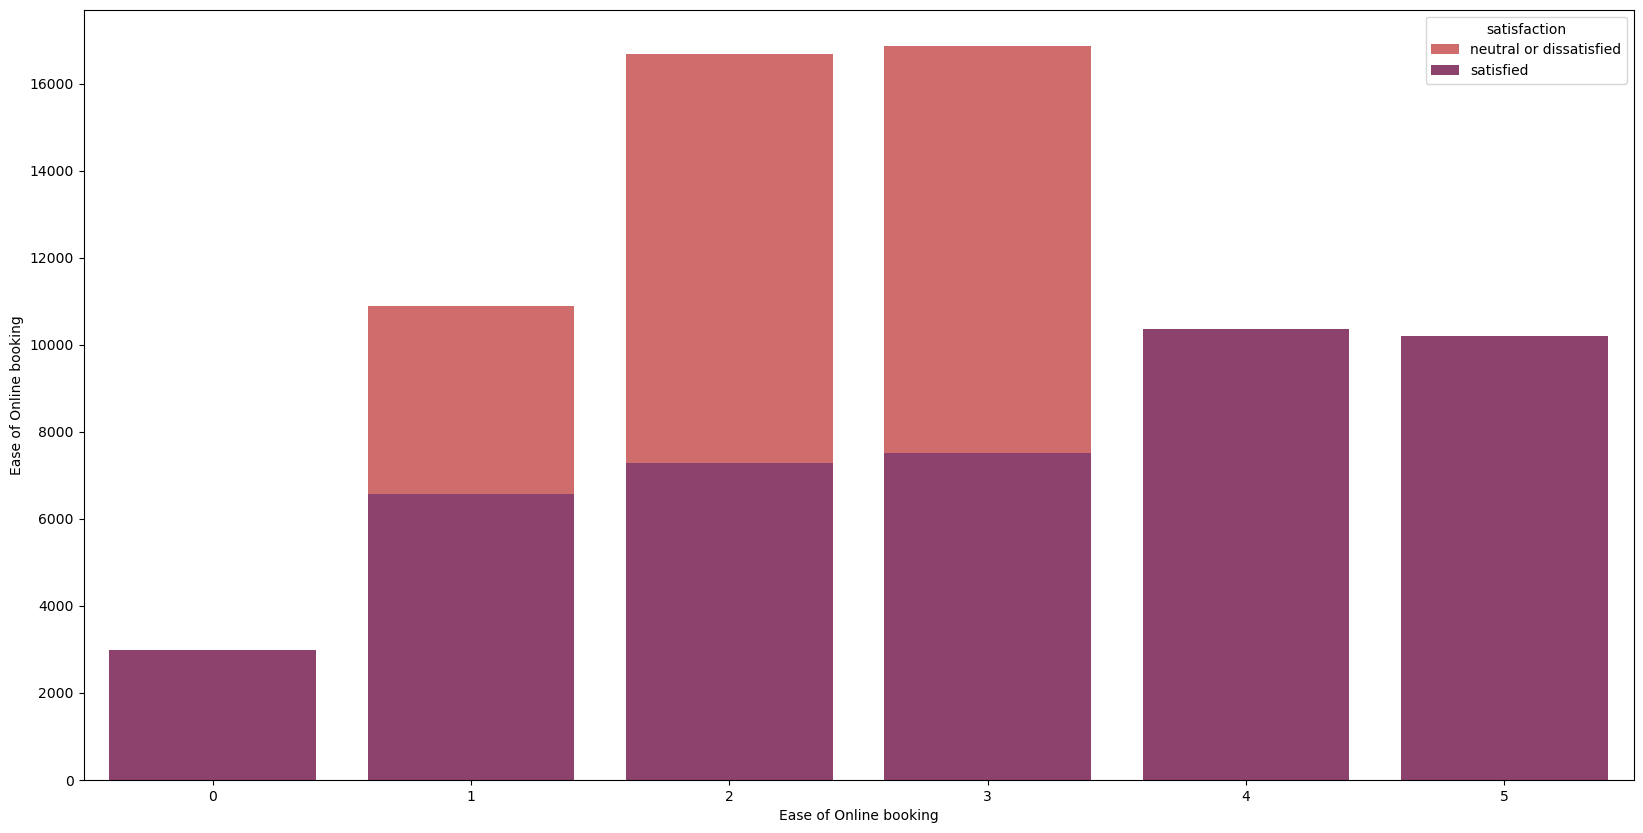

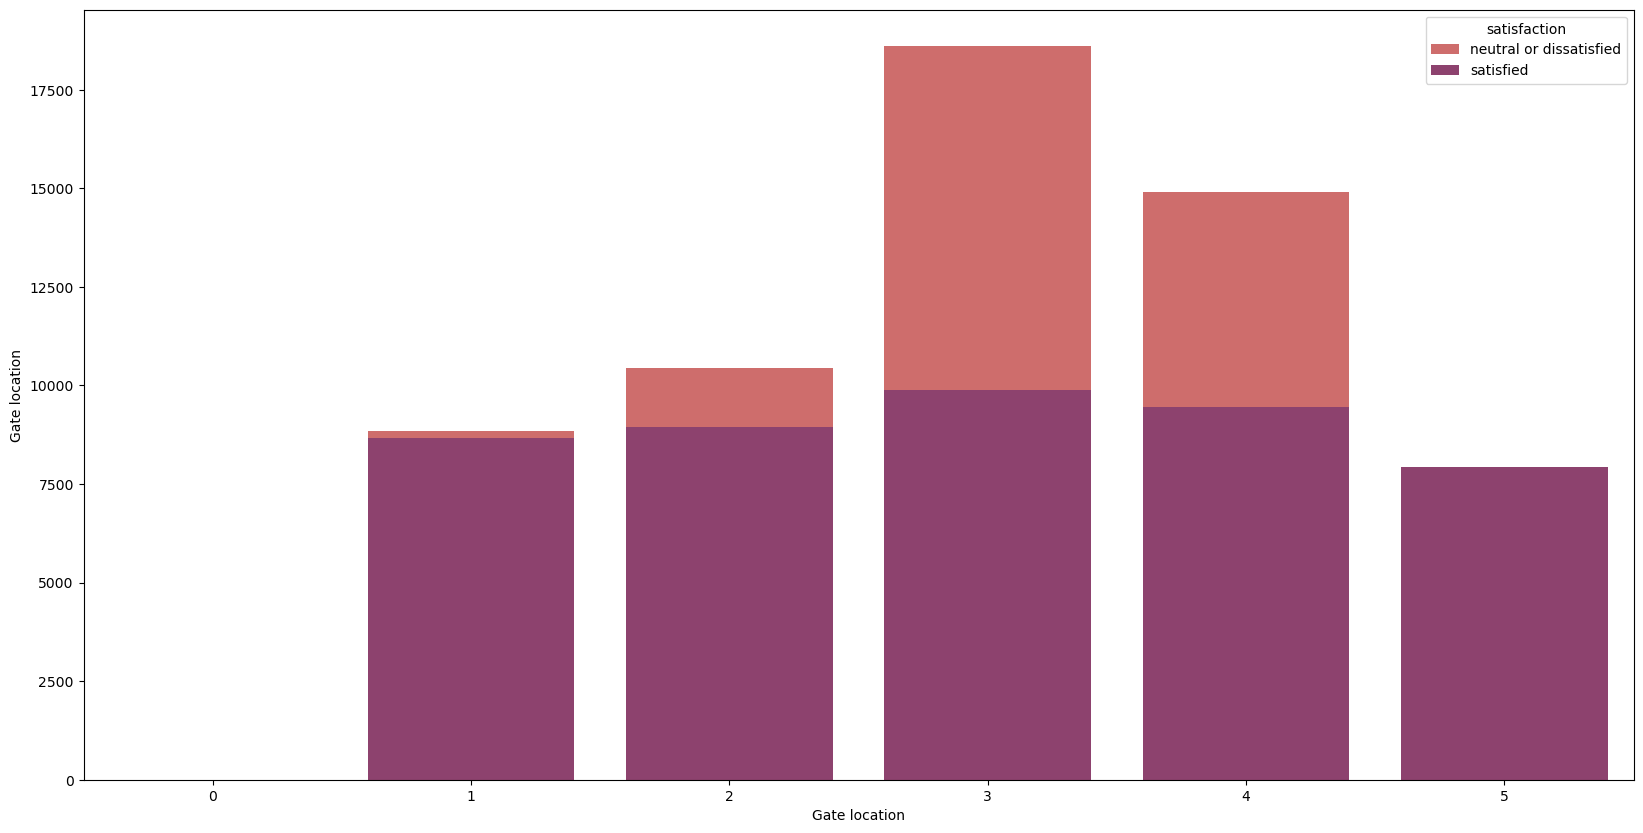

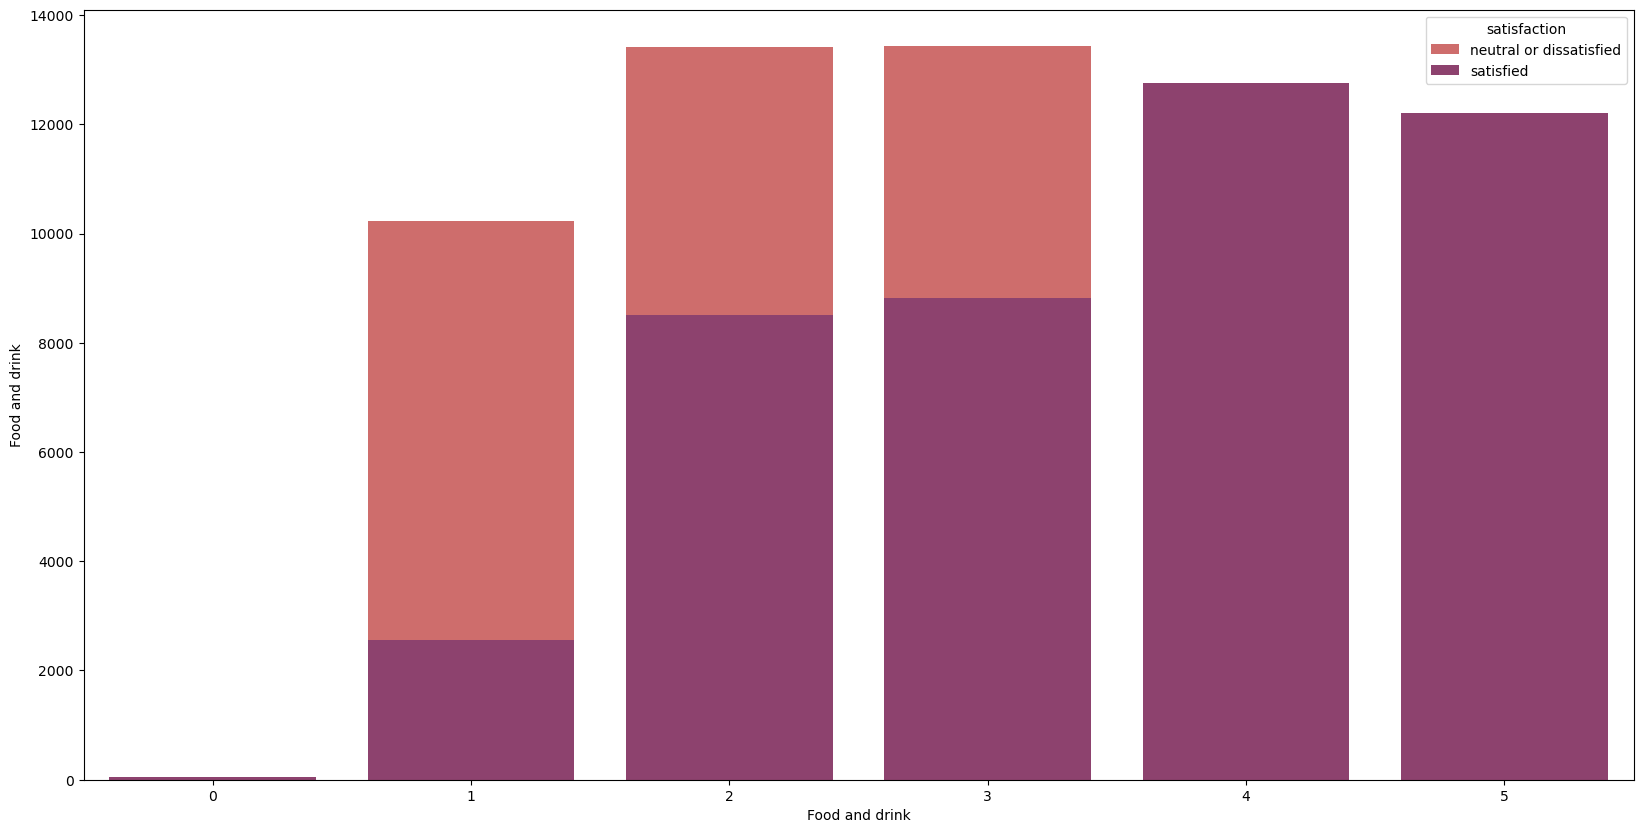

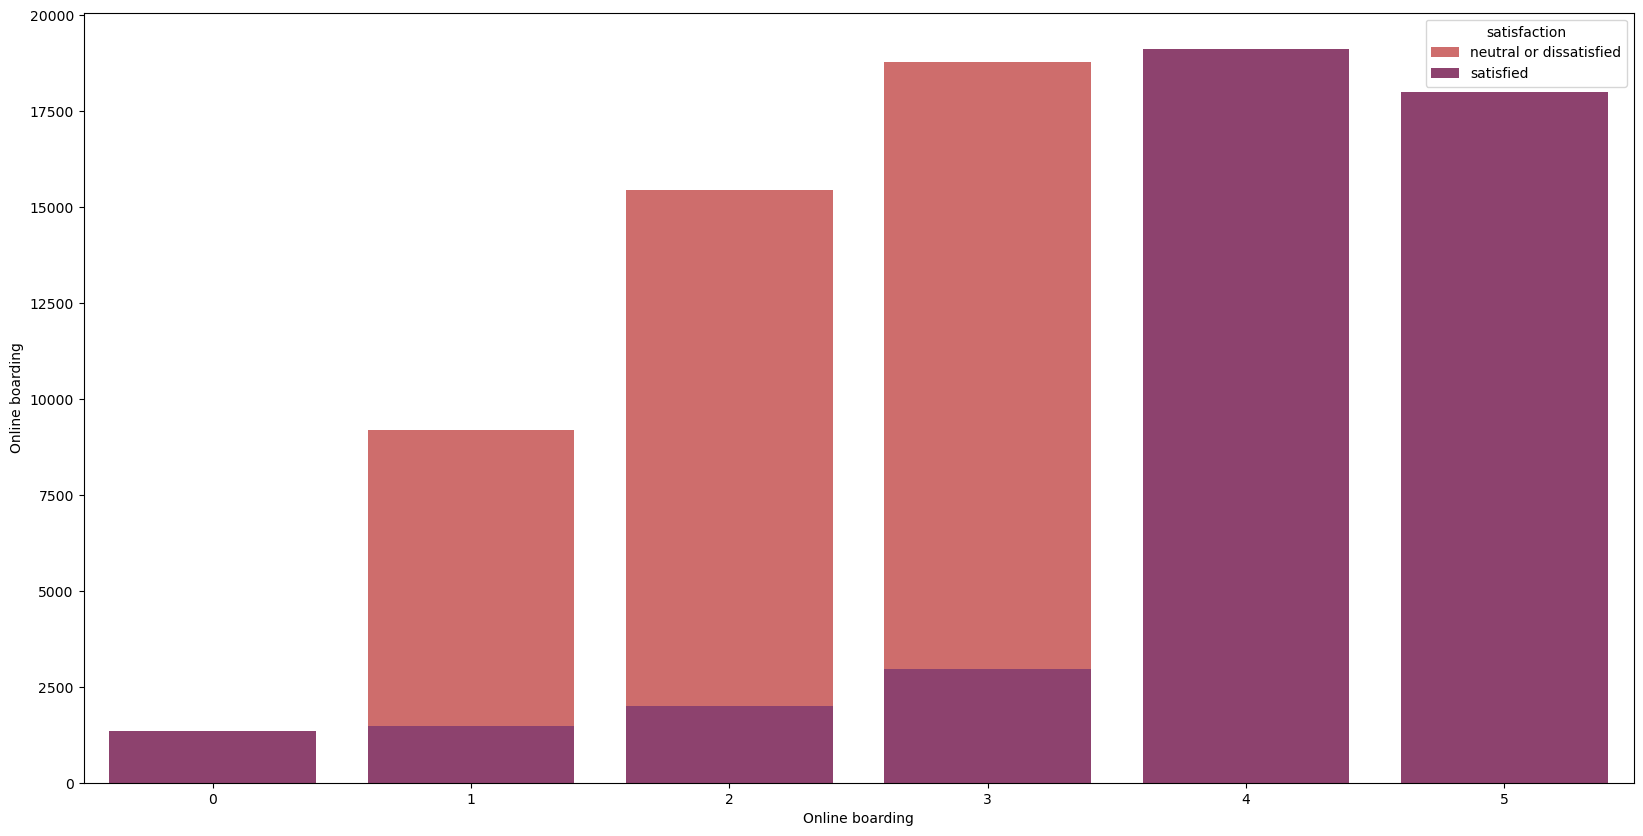

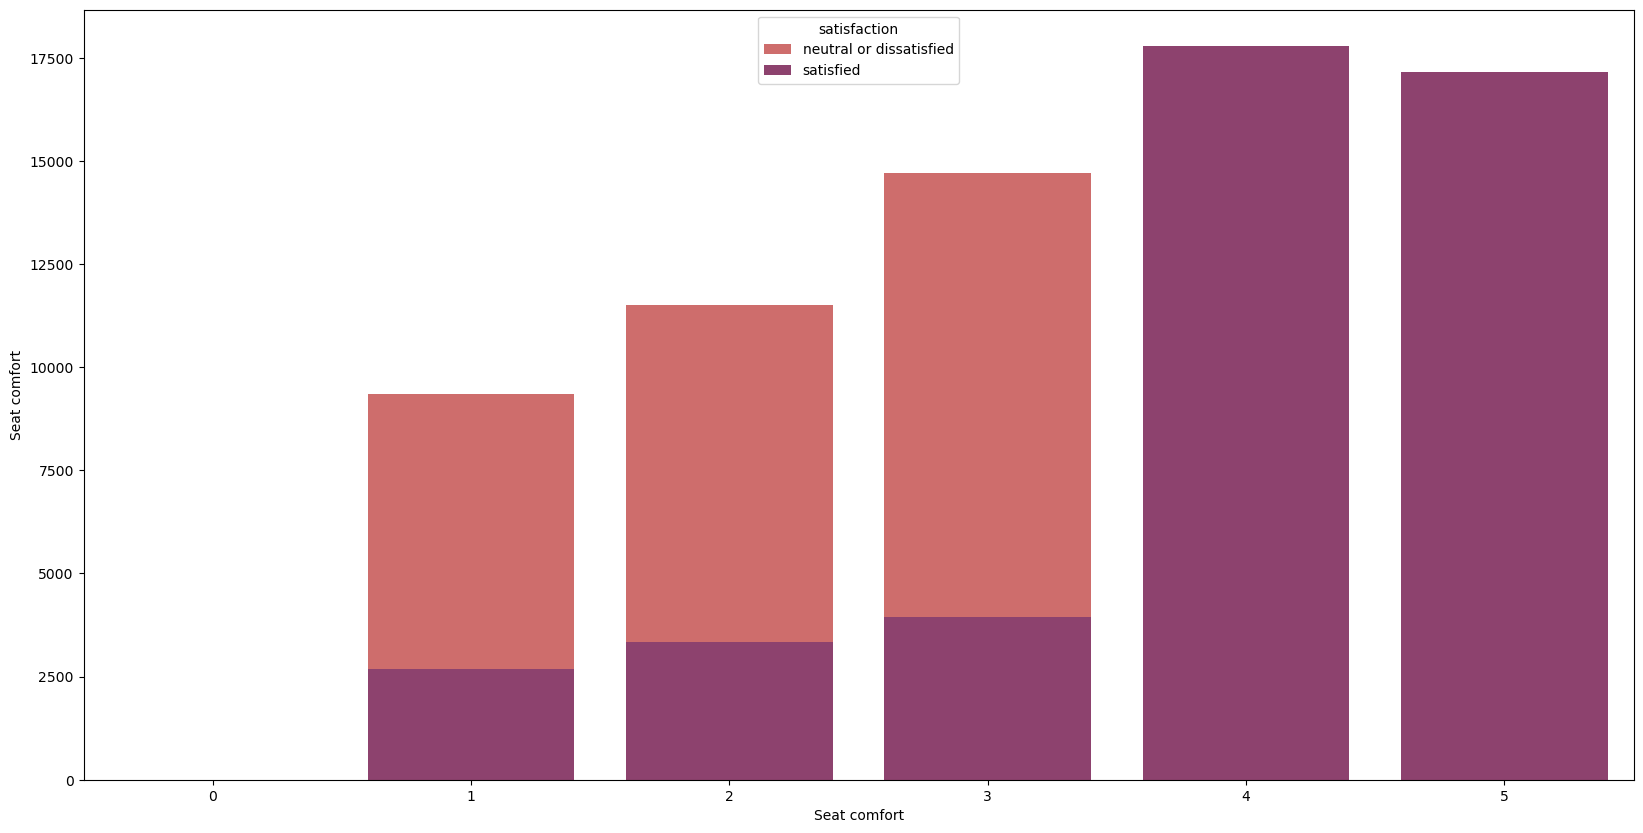

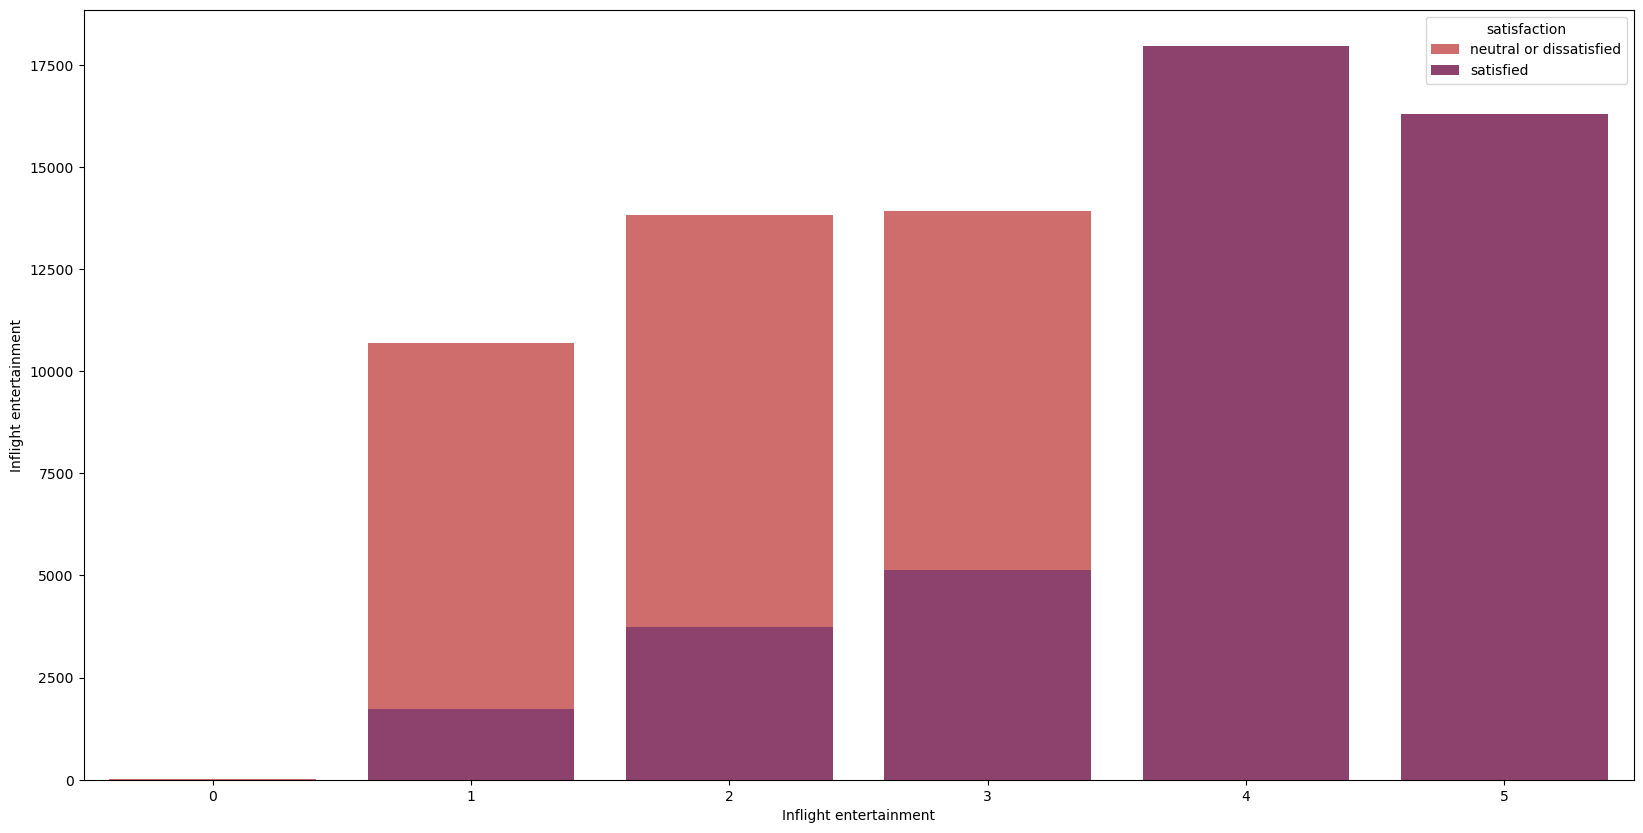

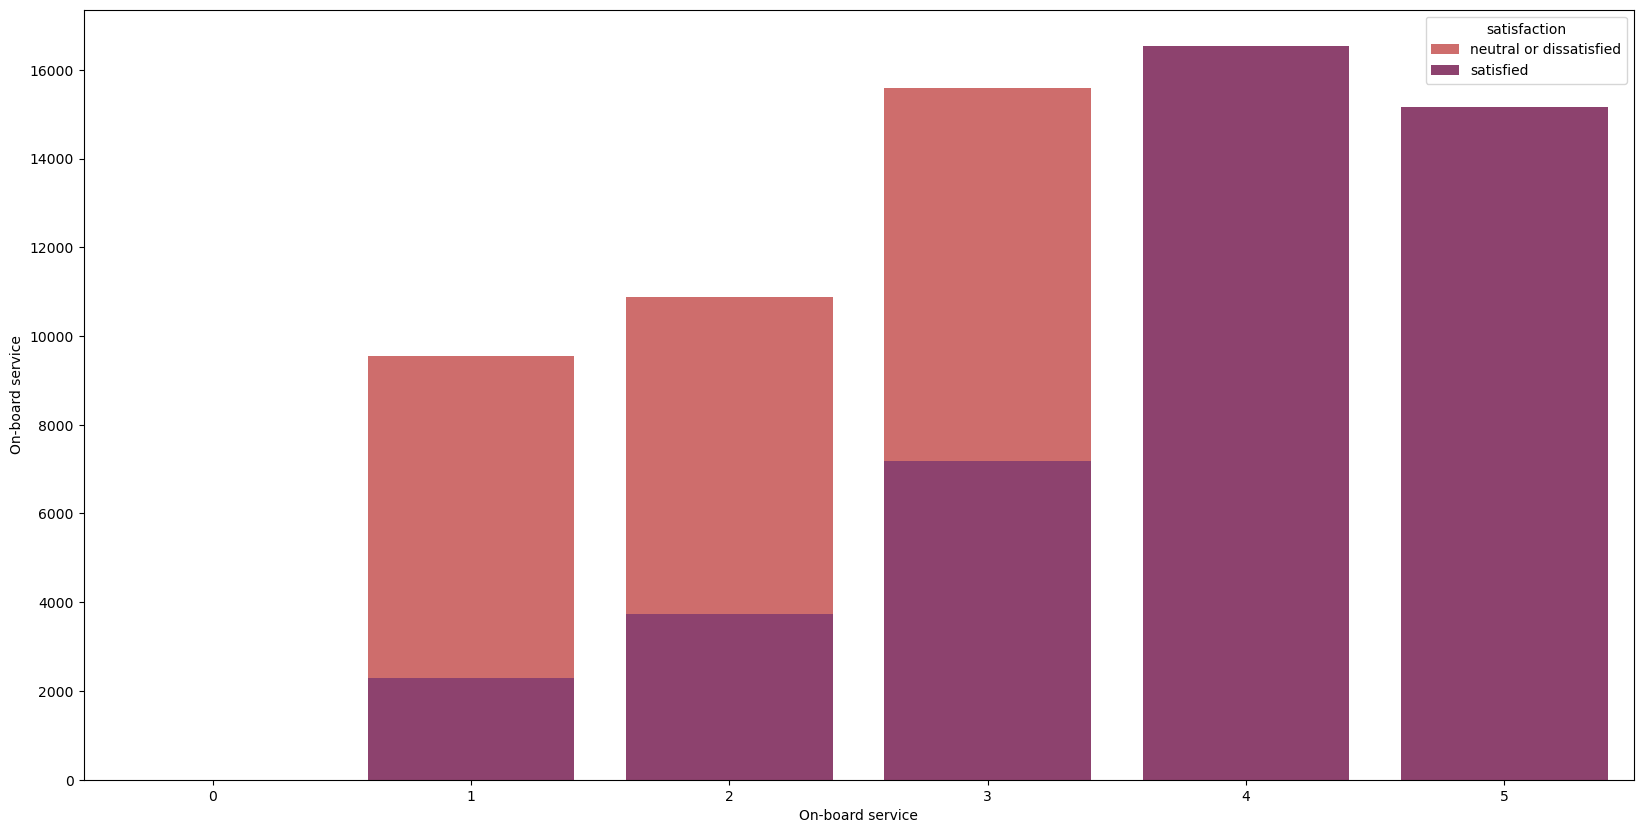

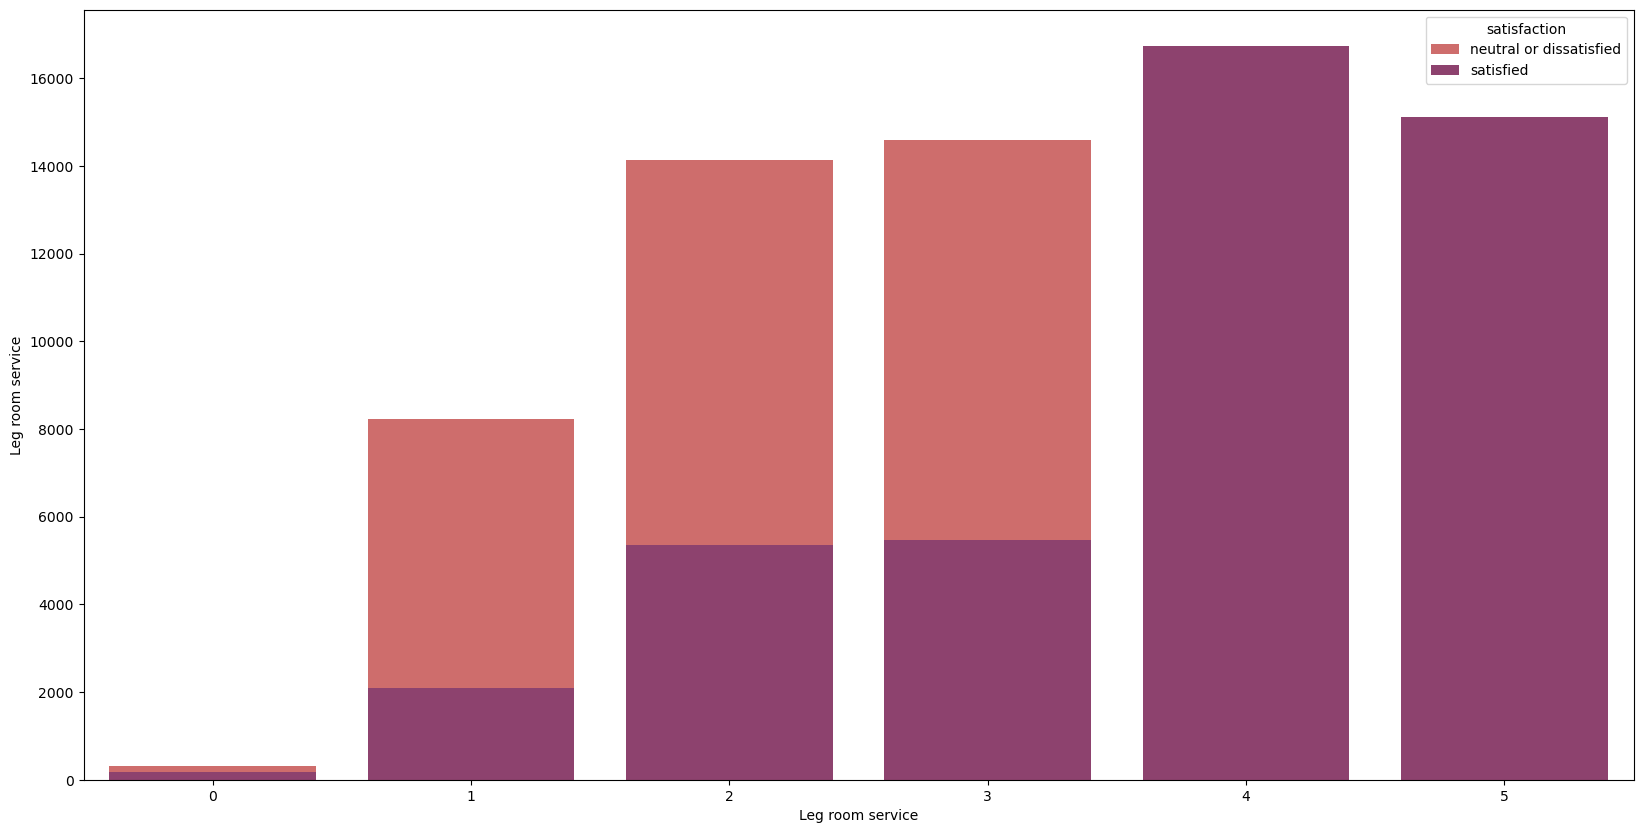

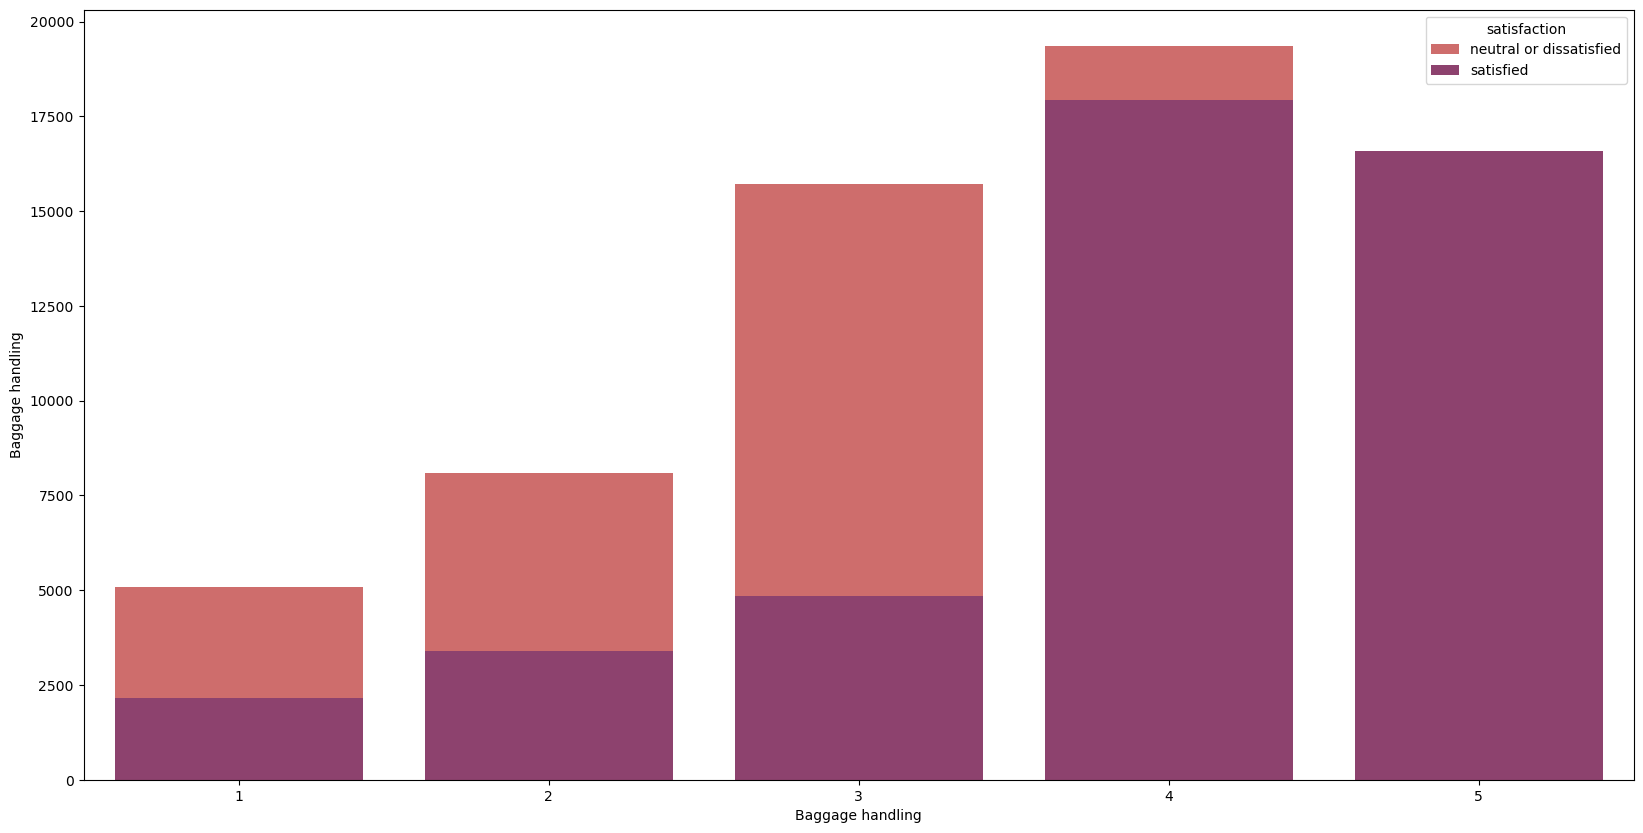

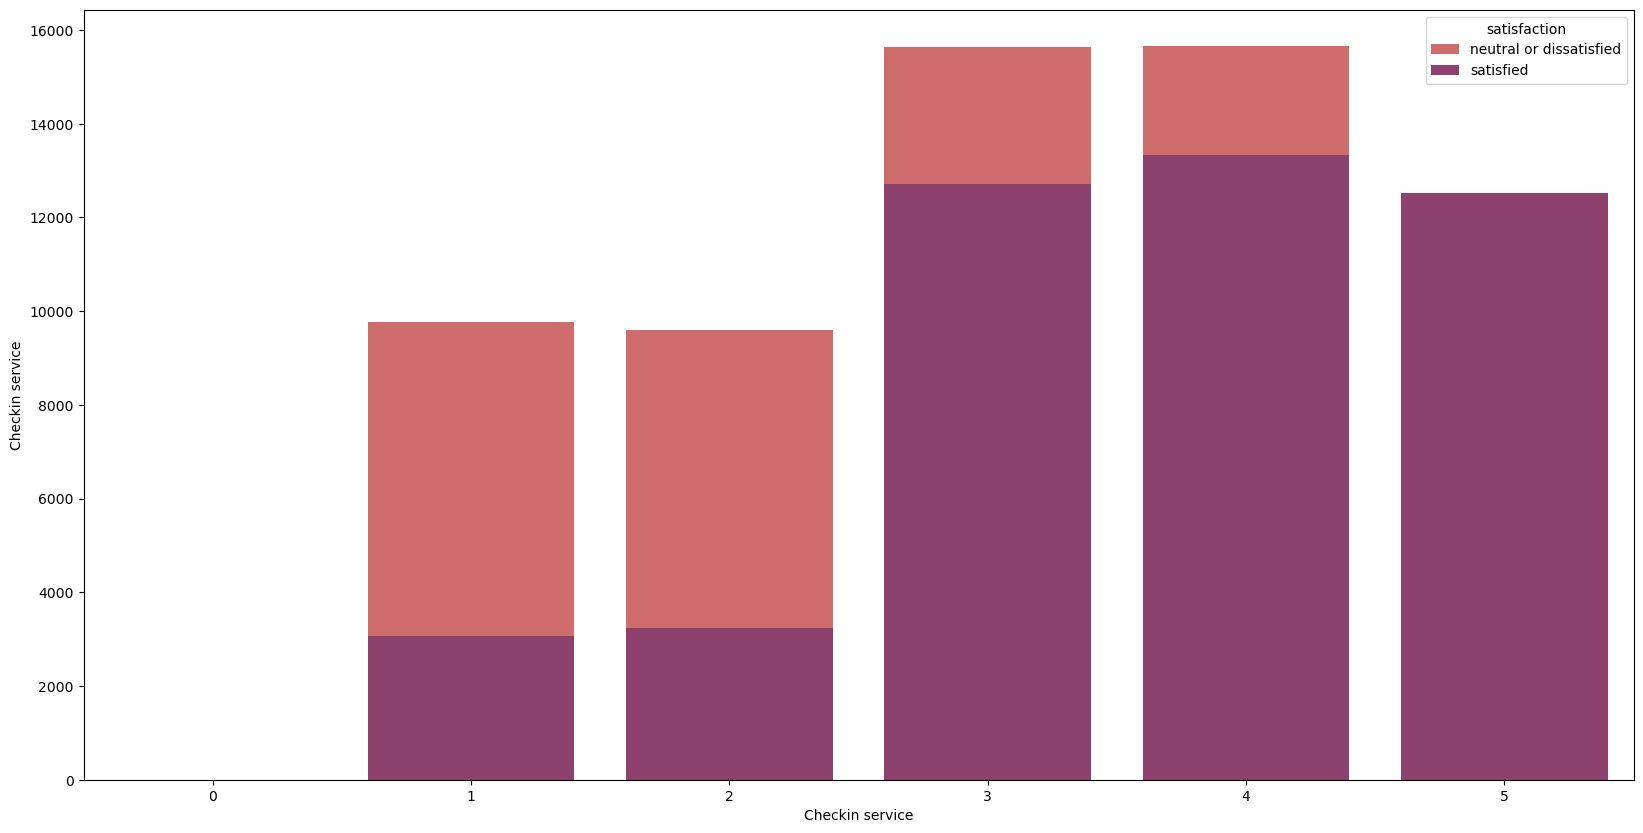

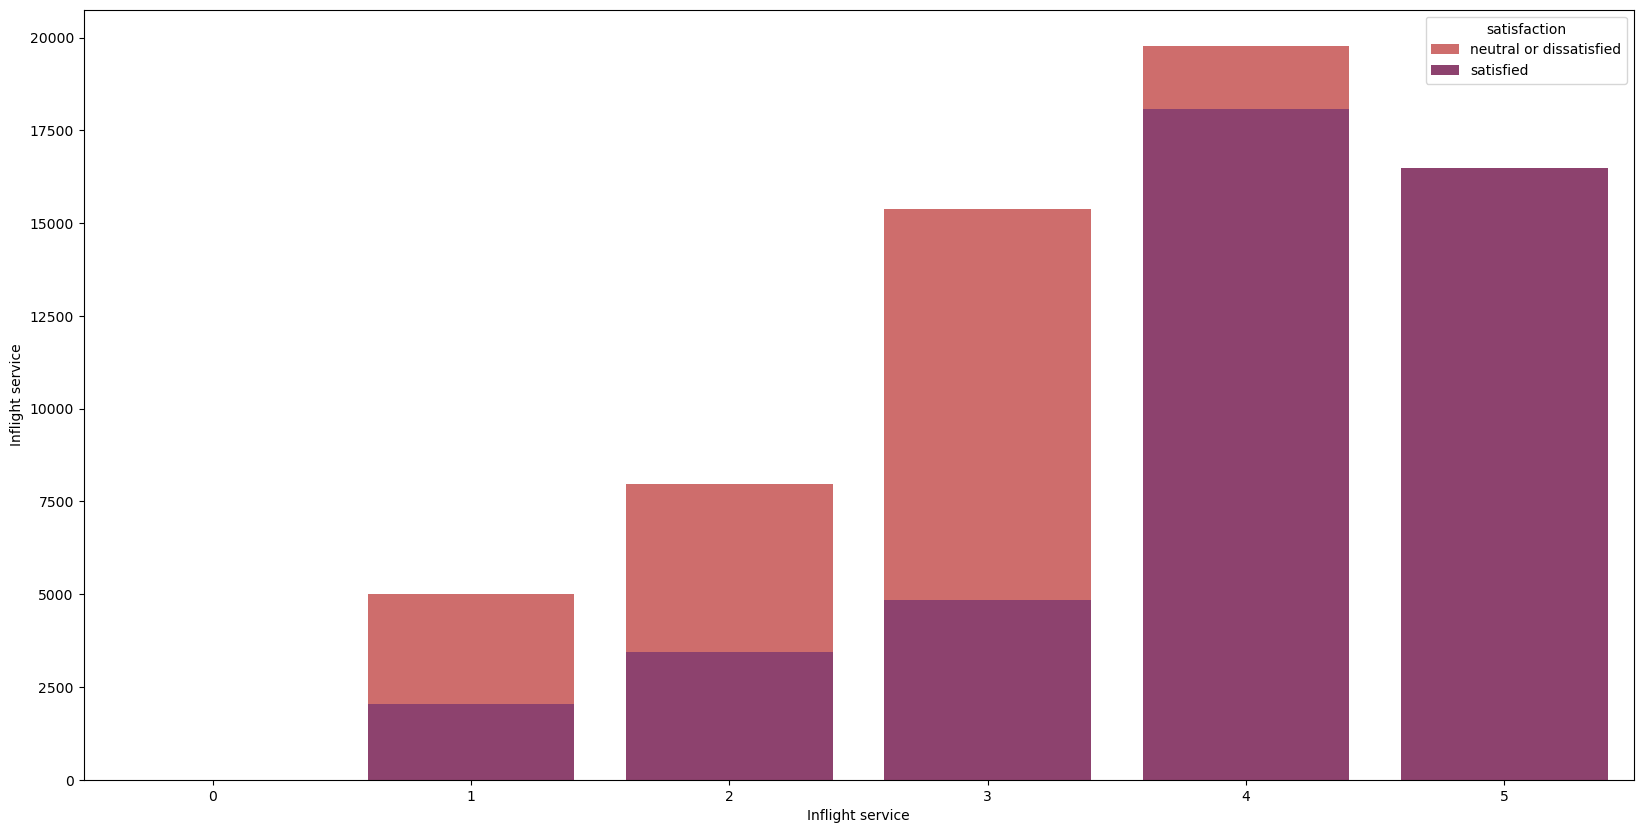

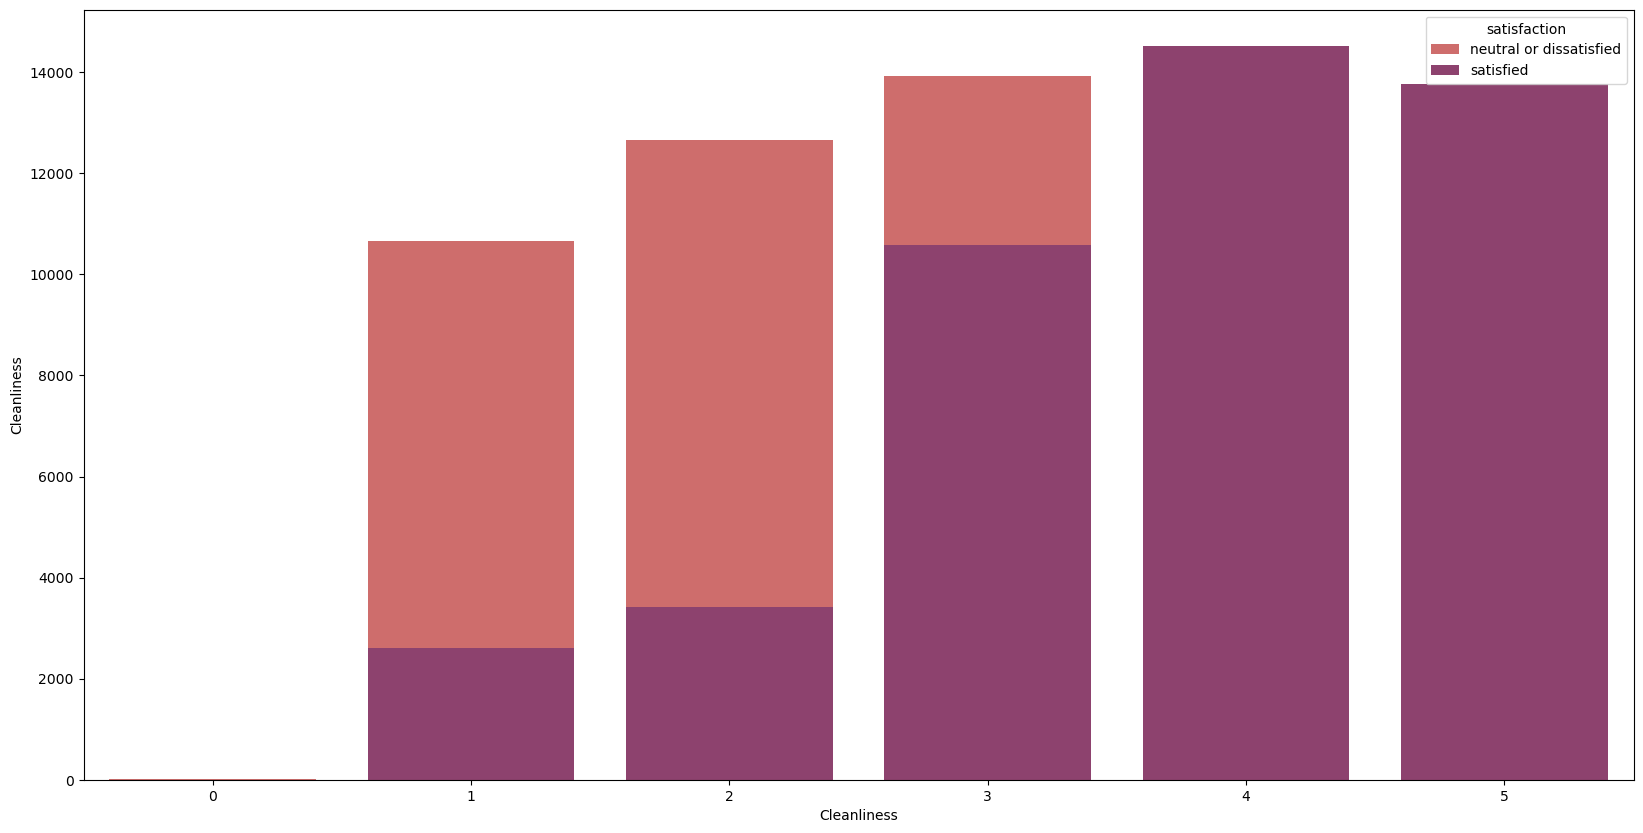

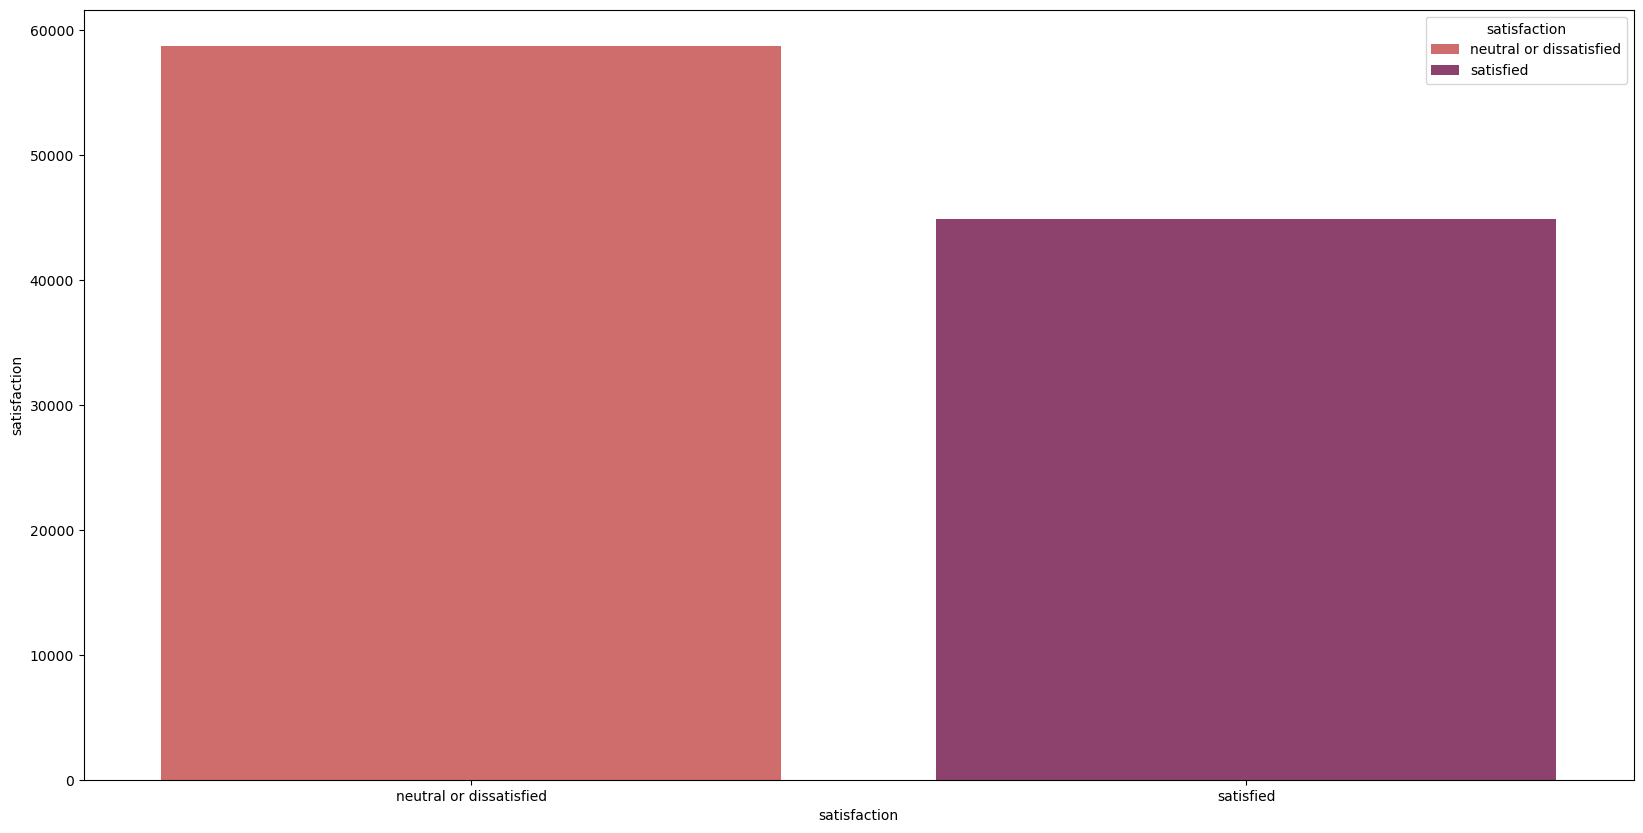

In [125]:
for label in labels:
    plt.figure(figsize=[20,10])
    sns.countplot(x=label, data=dataset, palette="flare", hue=dataset['satisfaction'], dodge=False)
    _ = plt.ylabel(label)
    _ = plt.show()

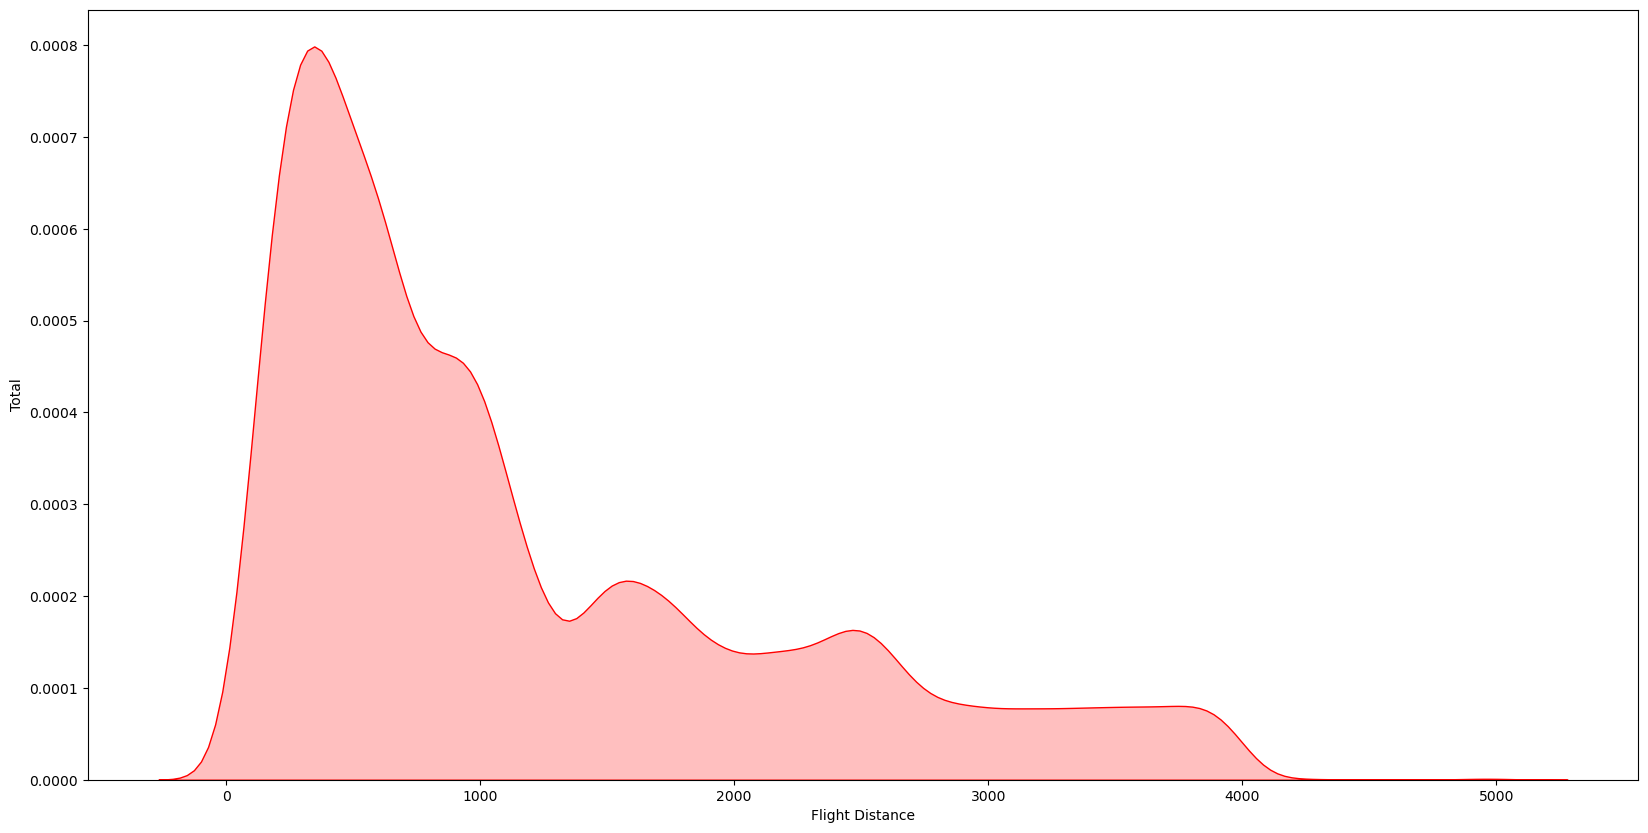

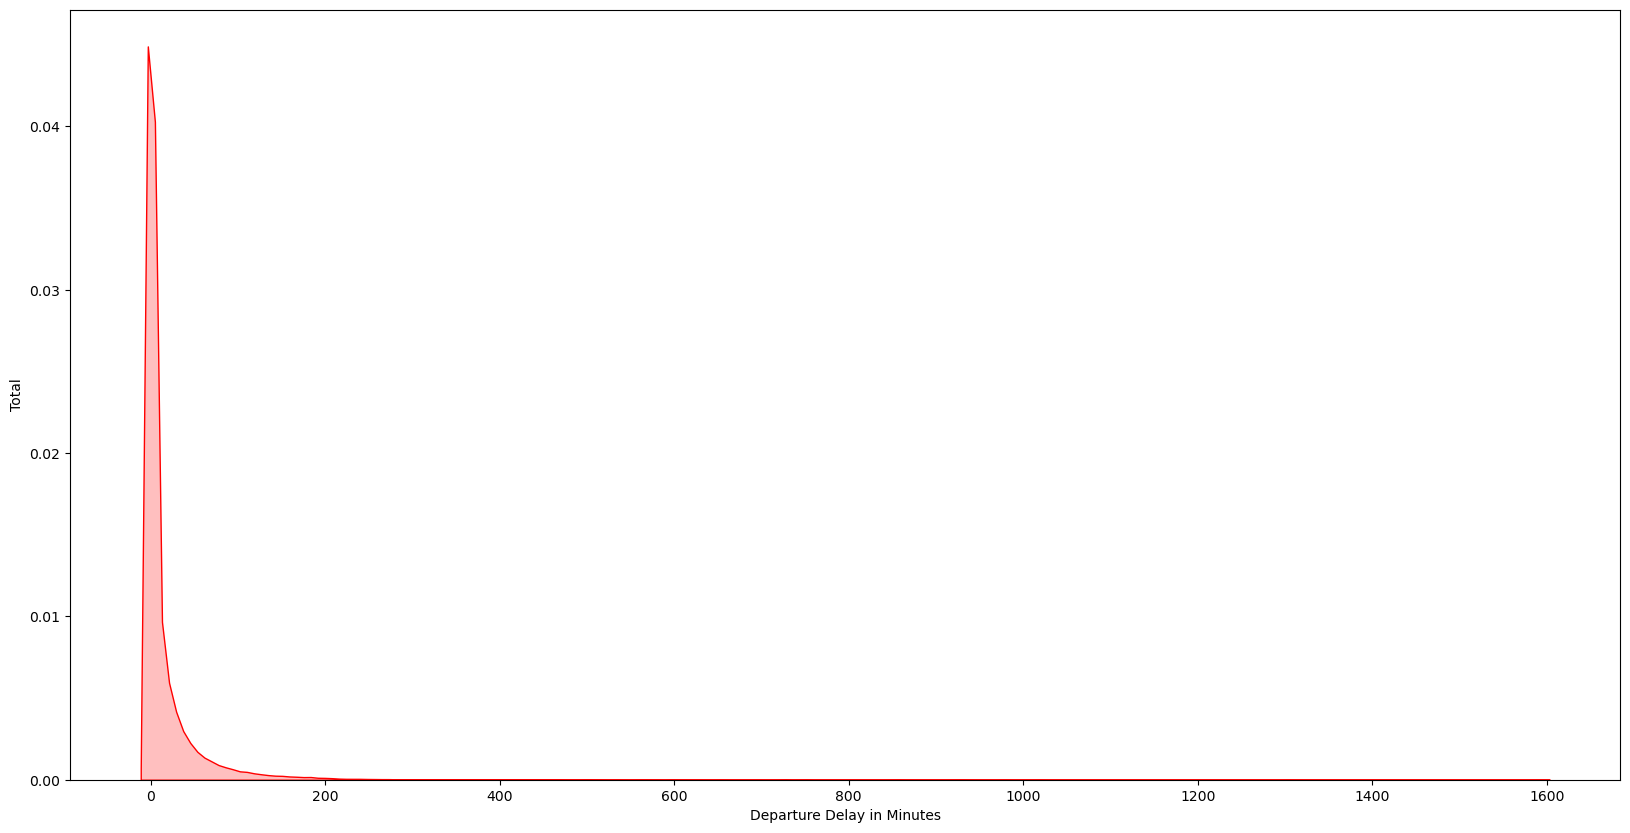

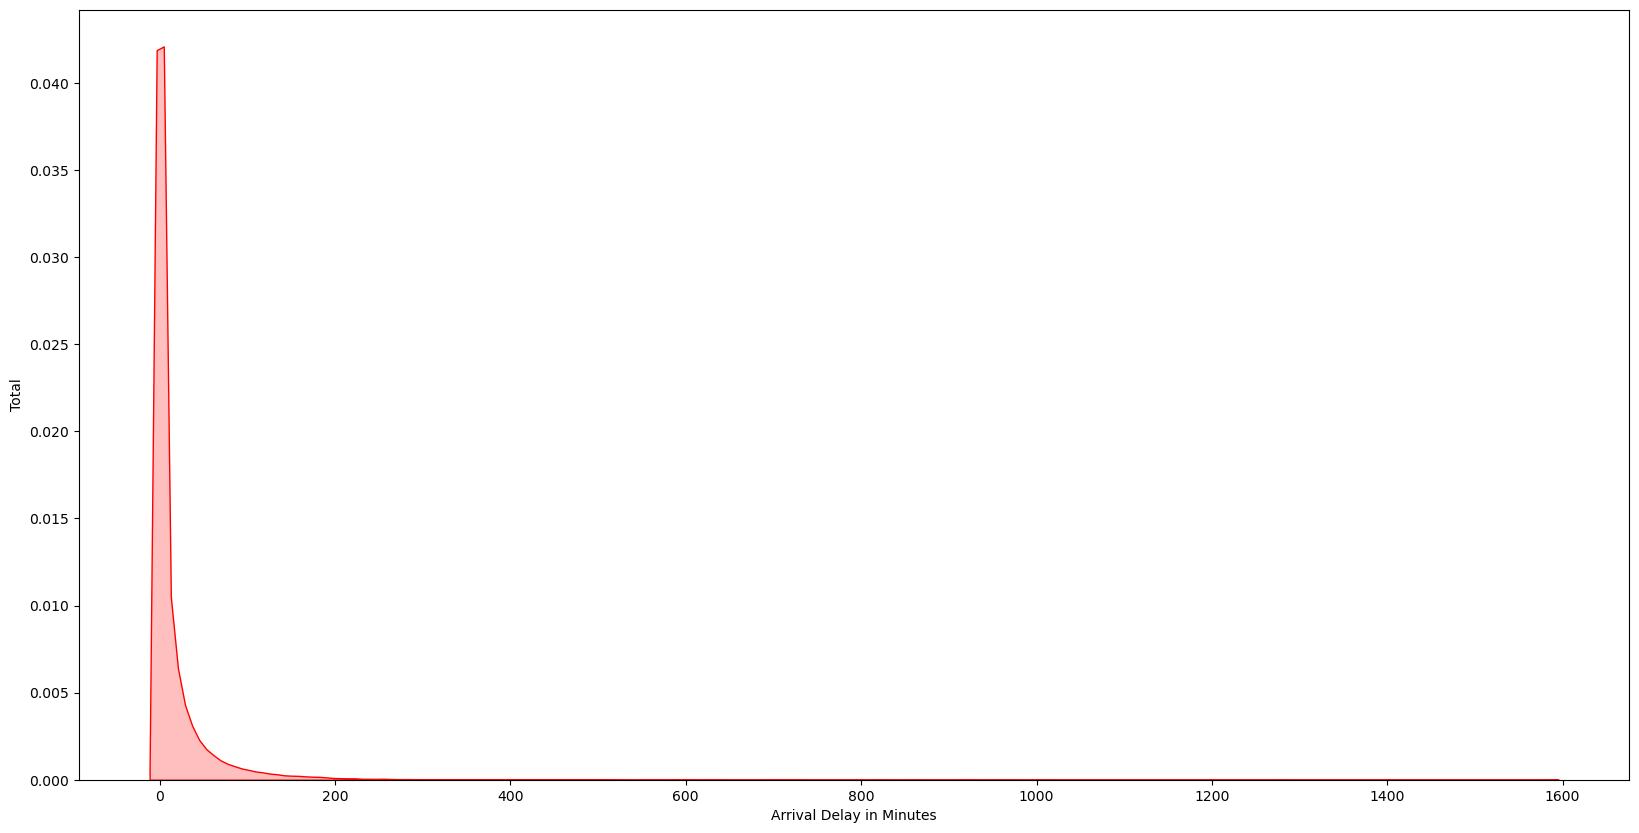

In [126]:
labels2 = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for label in labels2:
    plt.figure(figsize= [20,10])
    sns.kdeplot(dataset[label], color = 'red', fill = True)
    plt.xlabel(label)
    _ = plt.ylabel('Total')
    _ = plt.show()

### Análise de Outliers

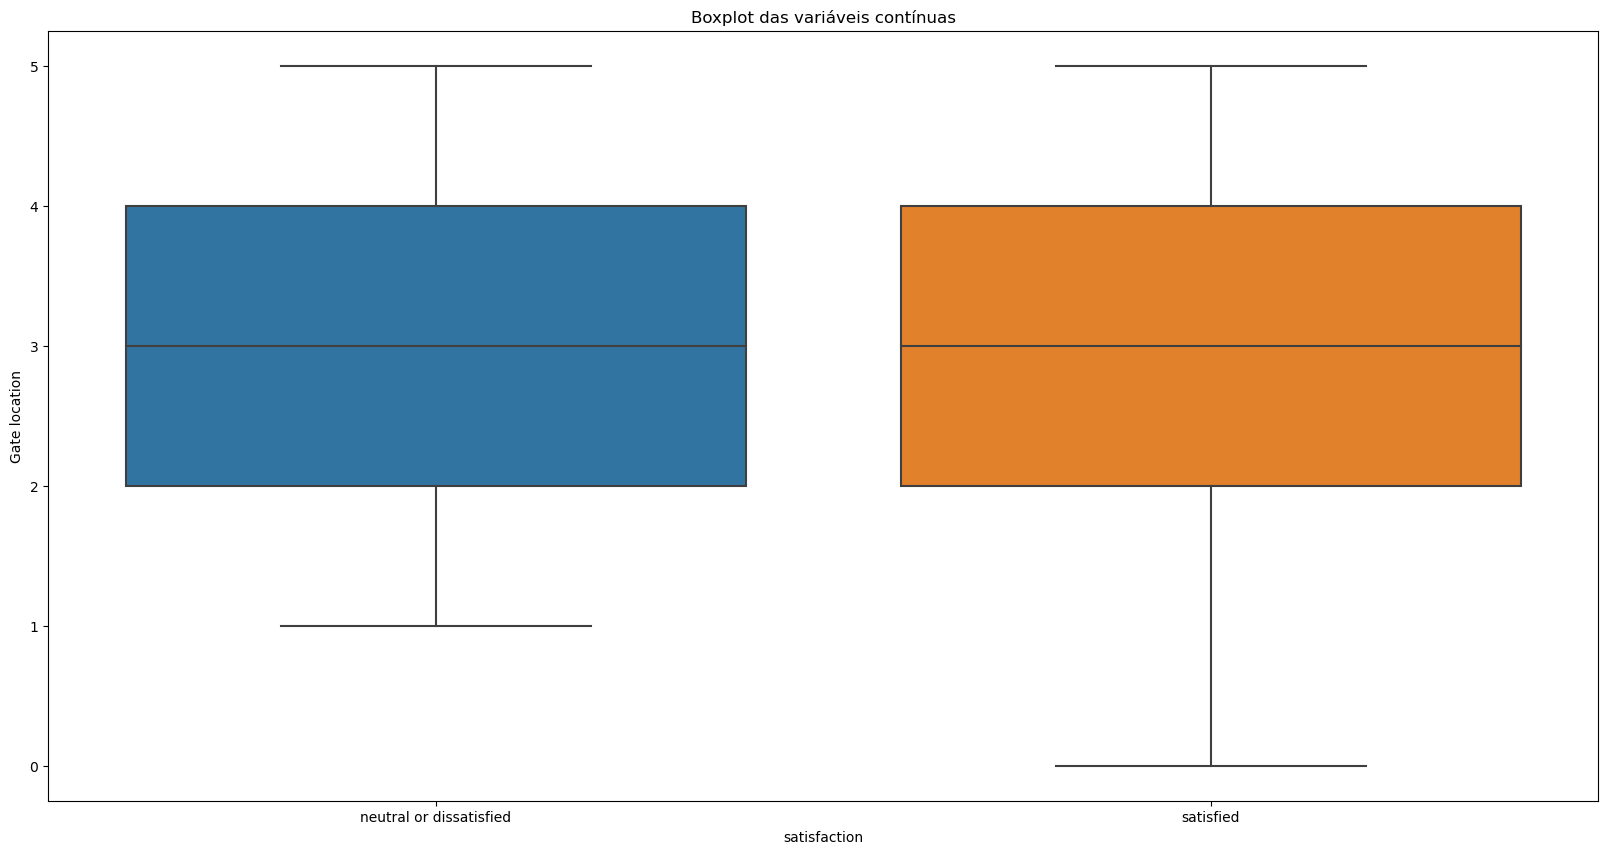

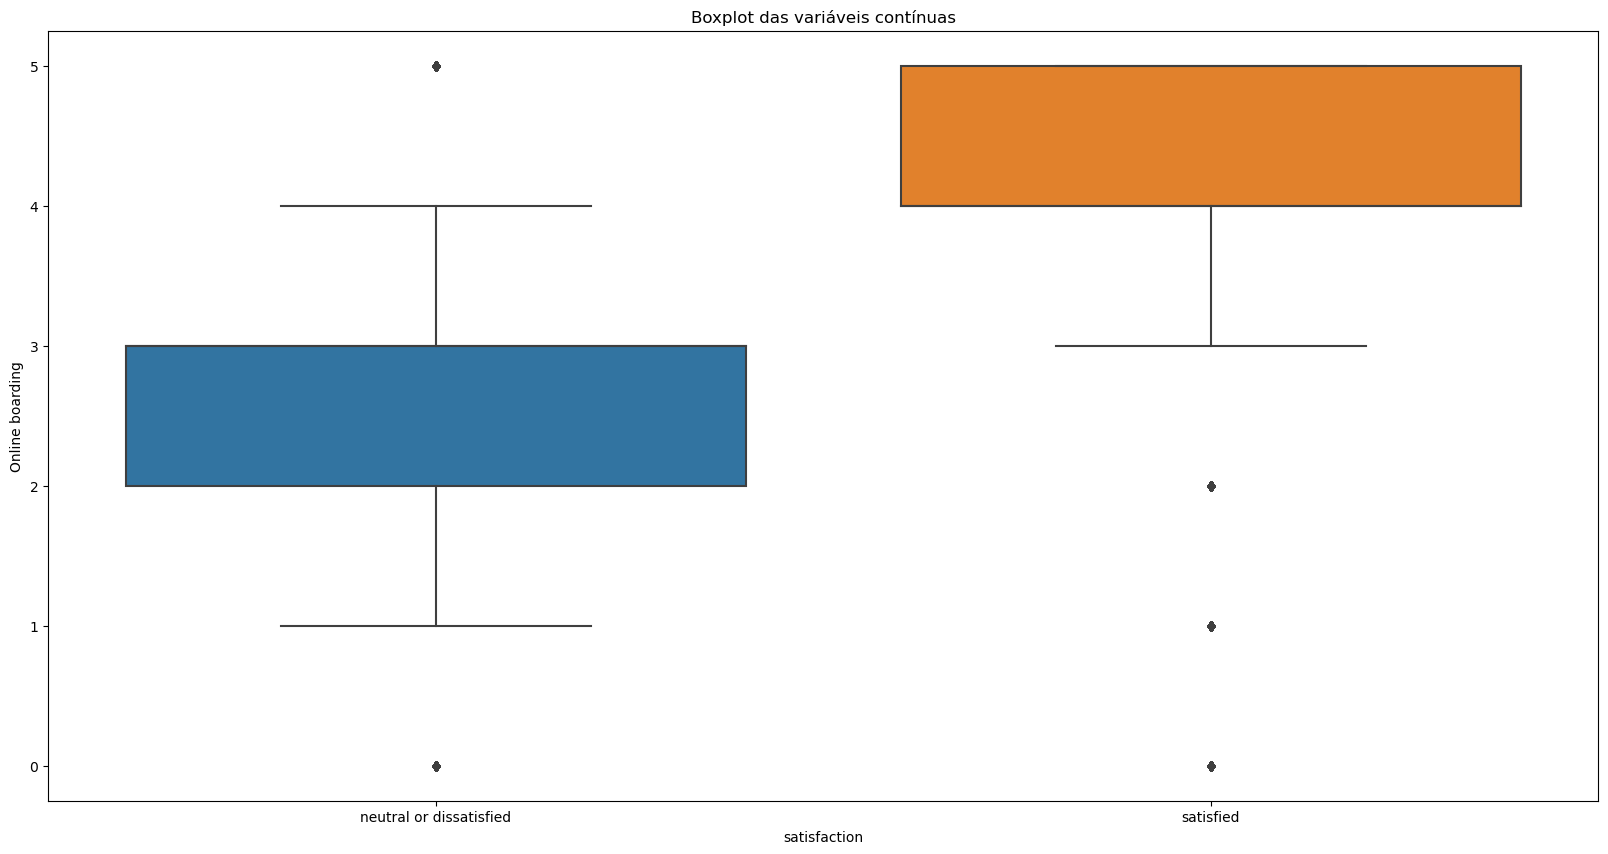

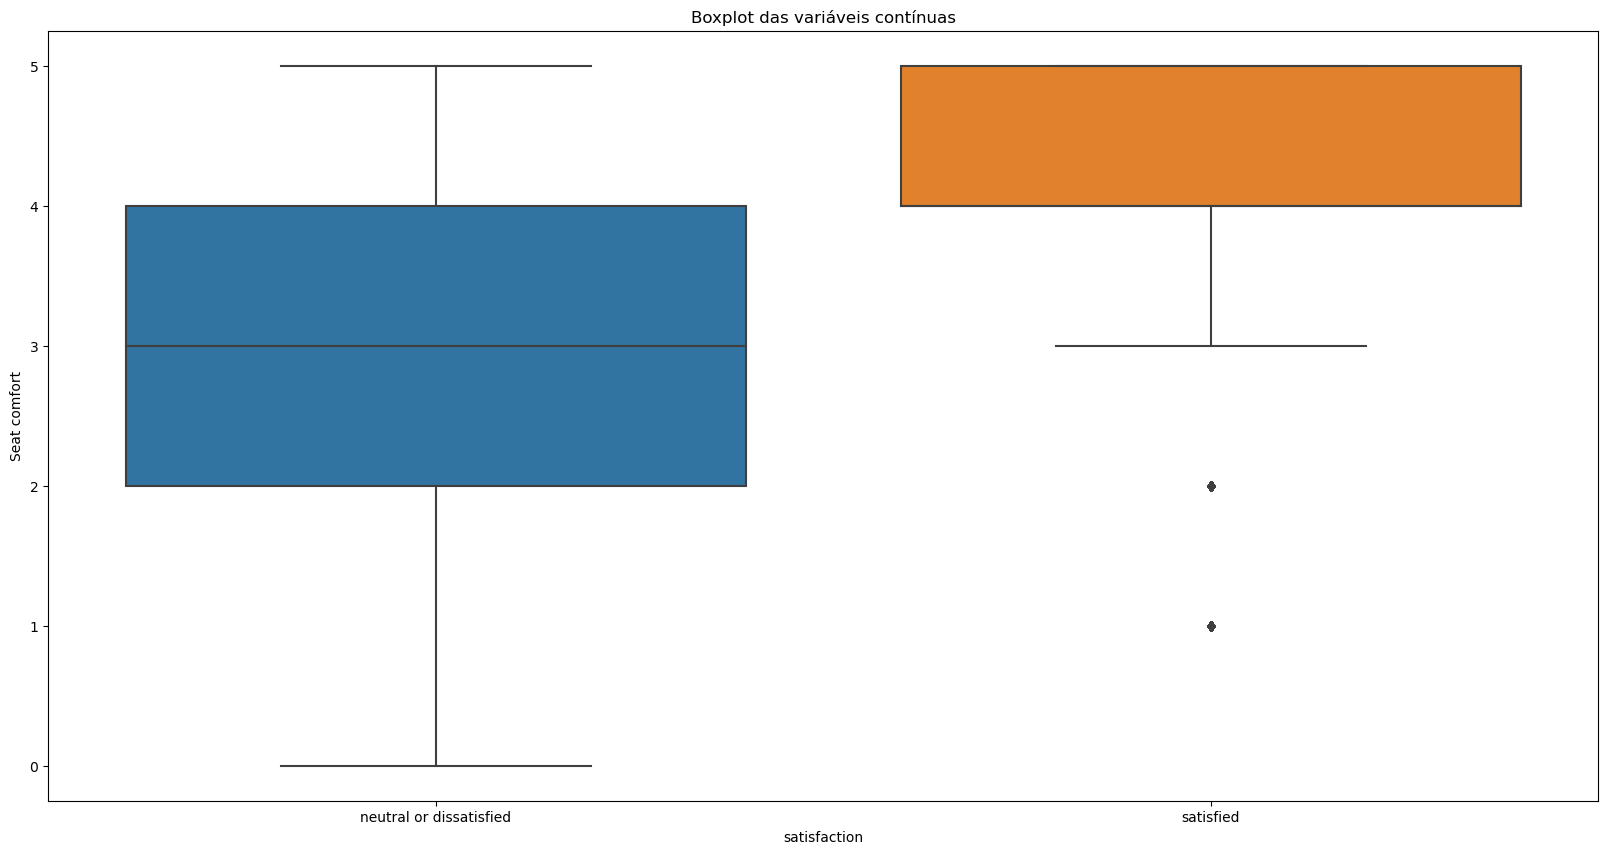

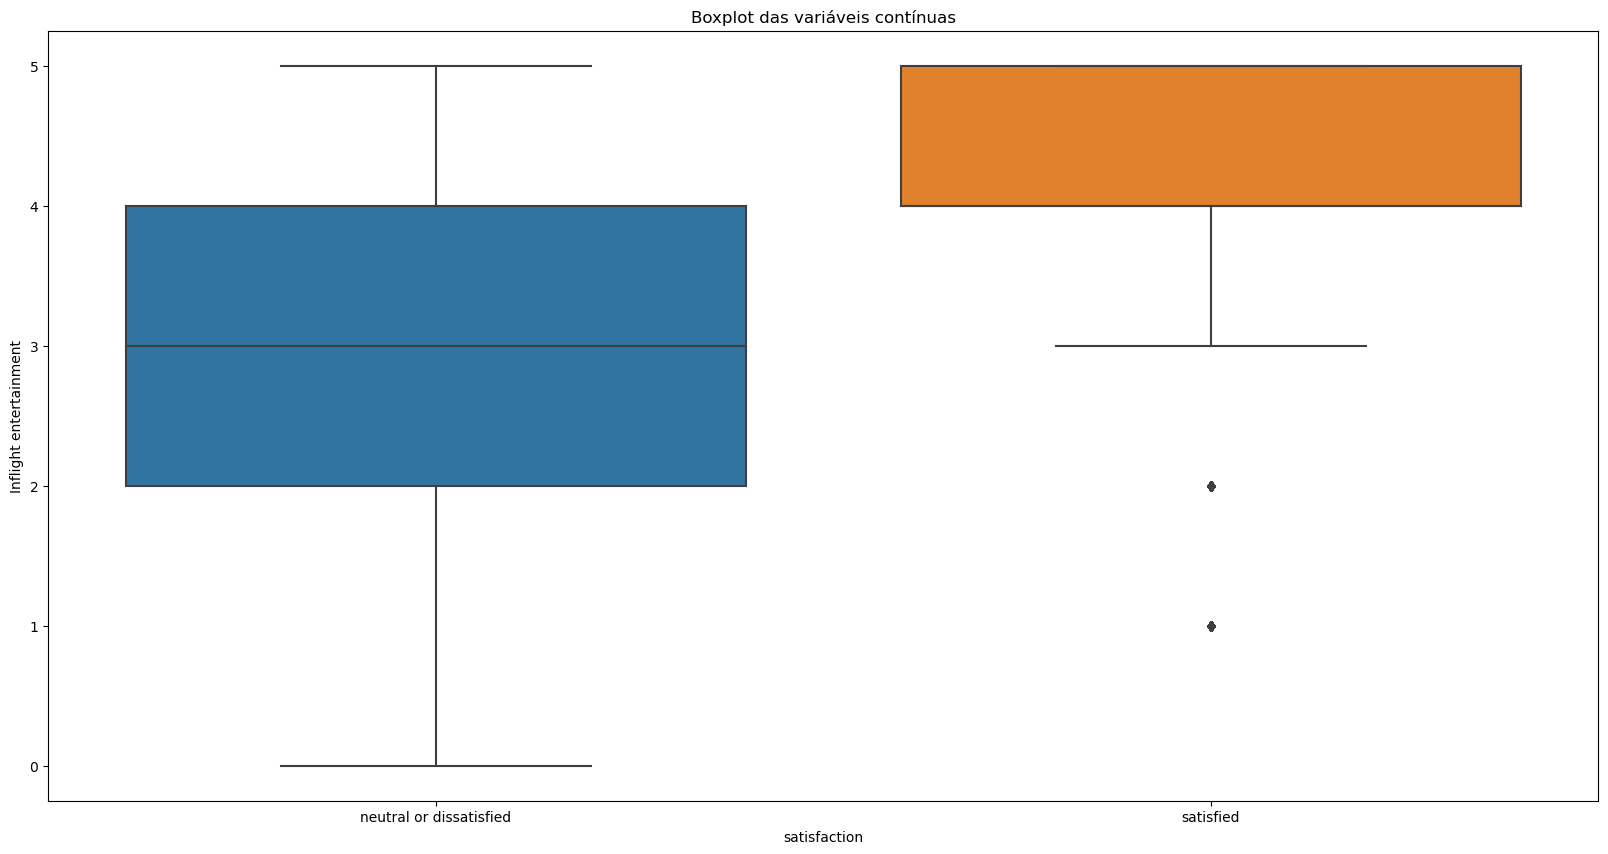

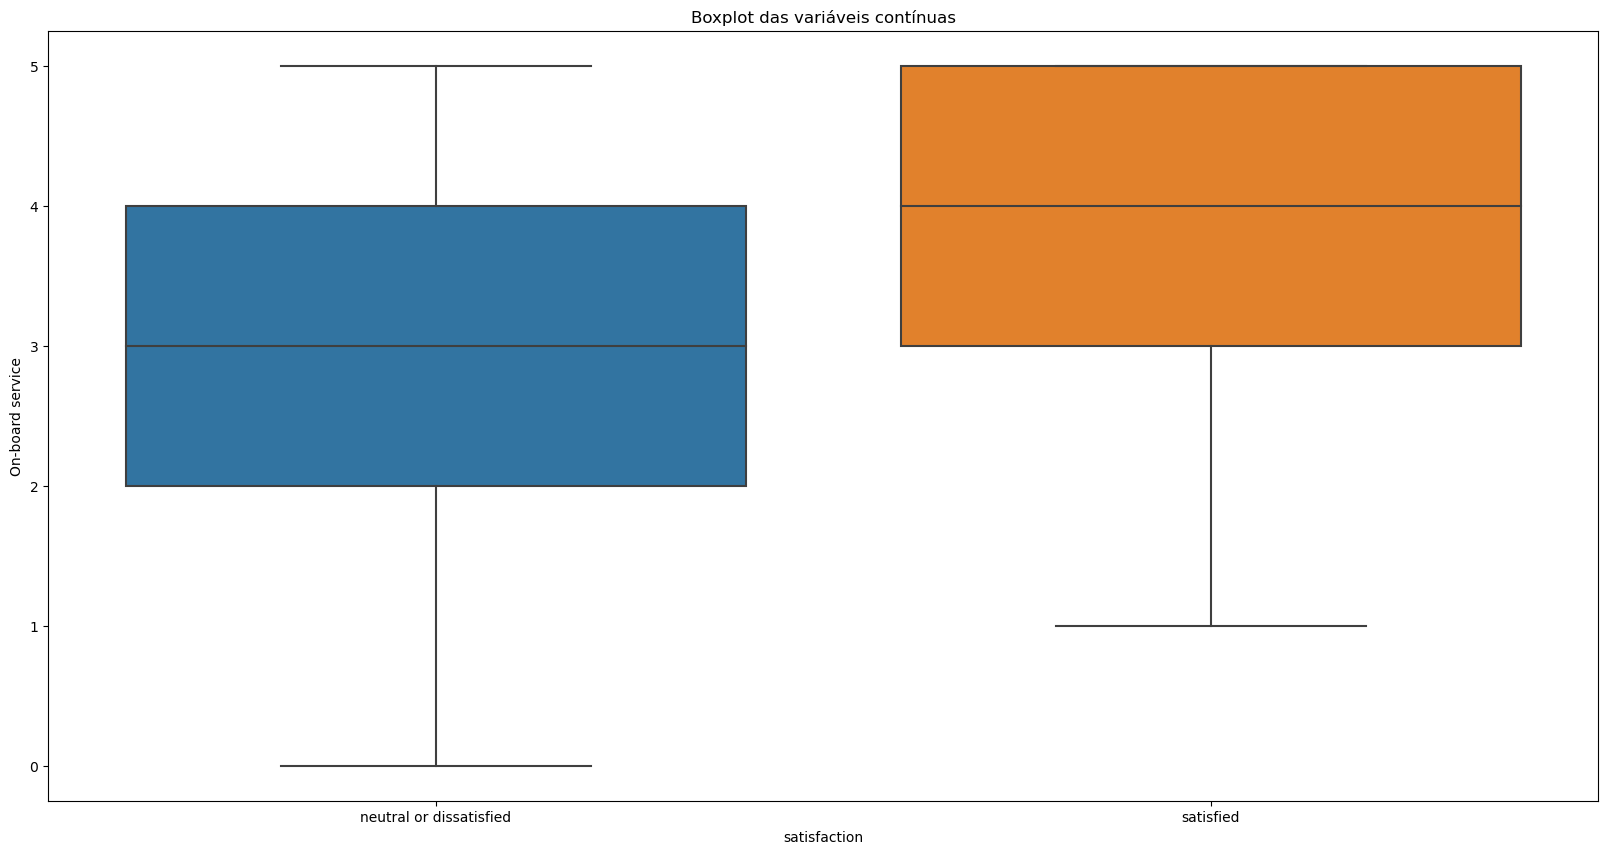

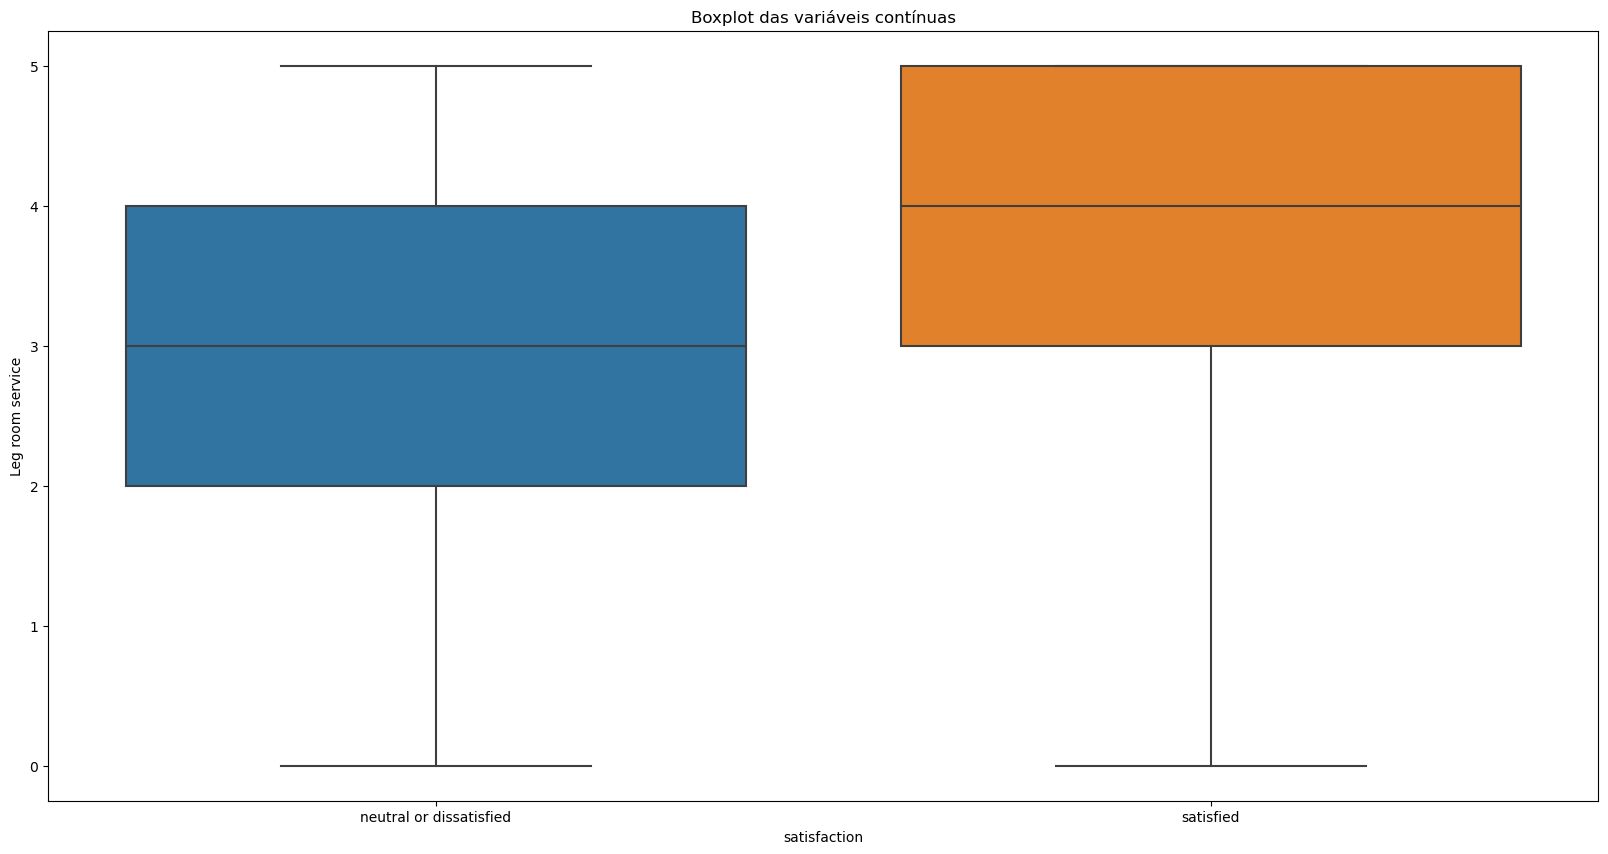

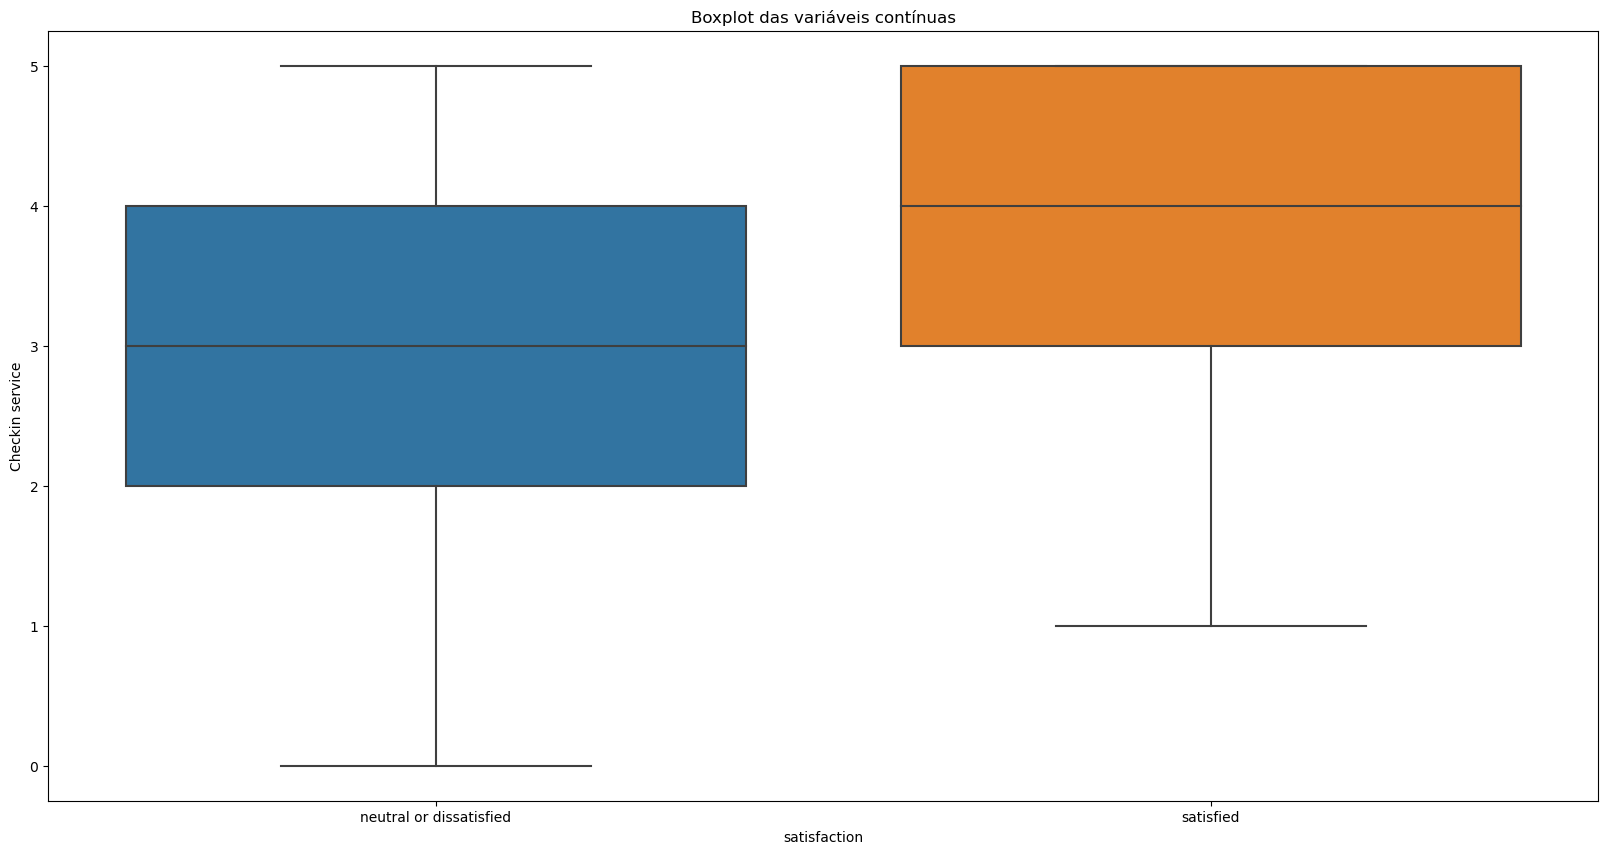

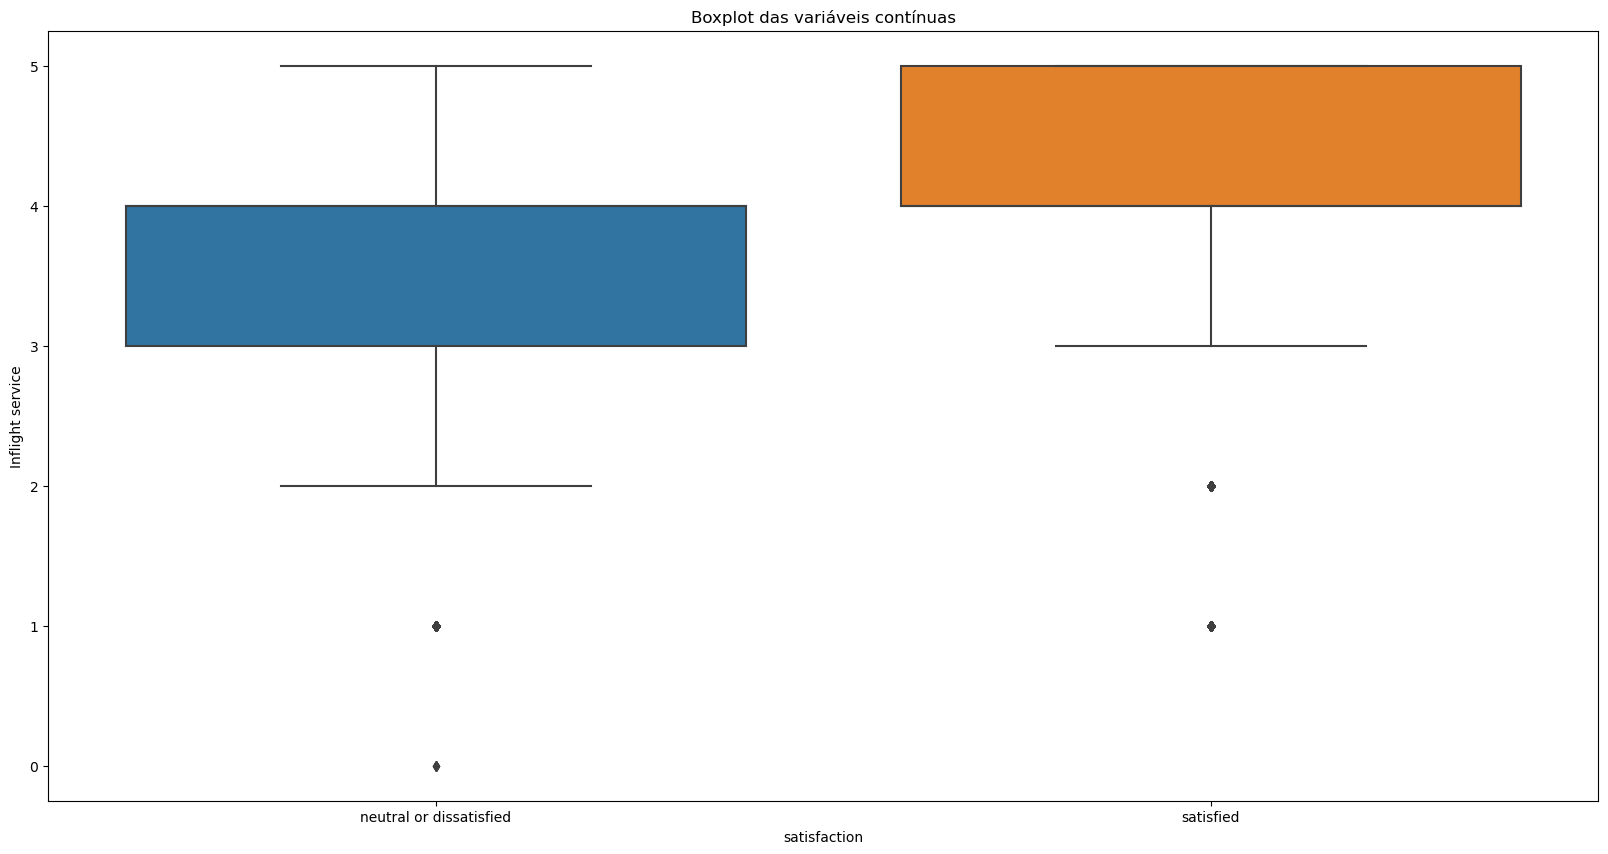

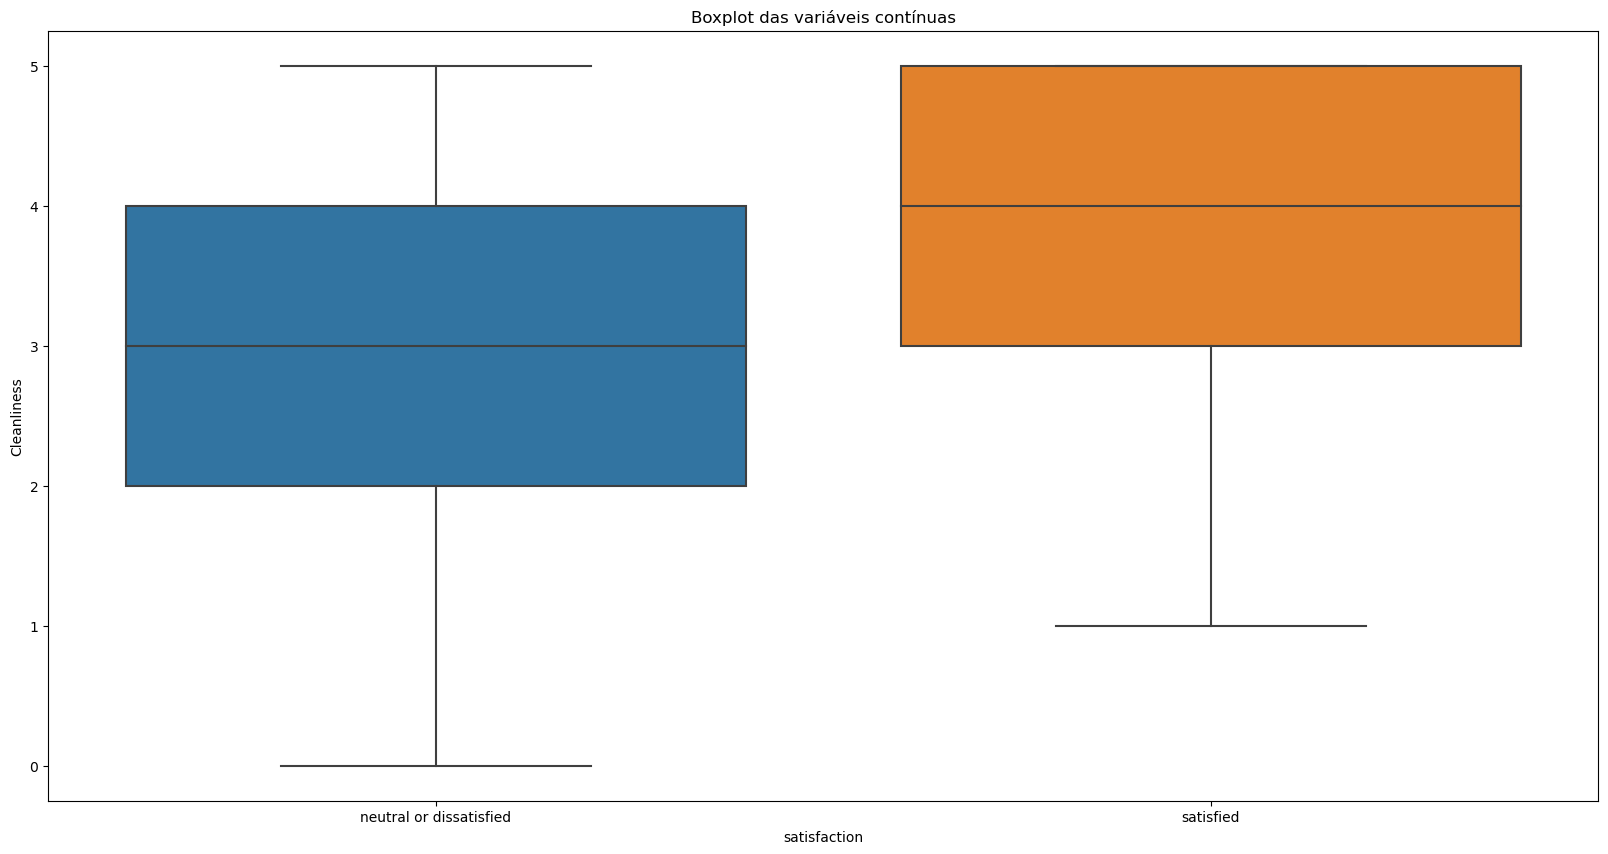

In [127]:
labels_outliers = ['Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service',  'Inflight service', 'Cleanliness']
for label in labels_outliers:
    plt.figure(figsize= [20,10])
    plt.title('Boxplot das variáveis contínuas')
    sns.boxplot(x=dataset['satisfaction'], y=dataset[label])

### Analisando correlação

In [128]:
corr_mat = dataset.corr()
corr_mat

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900
Inflight entertainment,0.076380,0.128645,0.209513,-0.004683,0.047185,0.003564,0.622374,0.285194,0.610614,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,-0.027691,-0.030703


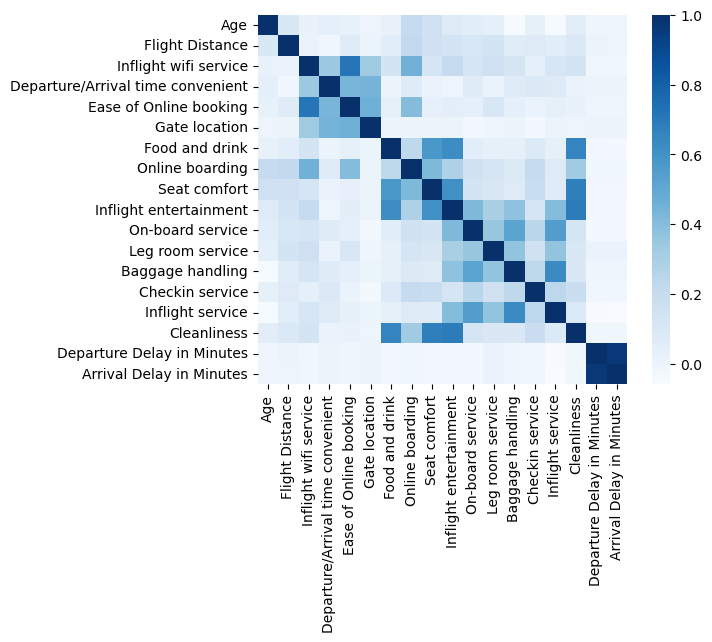

In [129]:
_ = sns.heatmap(corr_mat, square = True, cmap = 'Blues')

## Pré-processamento

In [130]:
# dropando coluna com muita correlação
dataset.drop('Departure Delay in Minutes', axis=1, inplace=True)

### Dropando outliers

In [131]:
# Remoção dos outliers
dataset = dataset.loc[~(((dataset['Online boarding'] > 4) | (dataset['Online boarding']<1)) & (dataset['satisfaction'] == 'neutral or dissatisfied'))]

dataset = dataset.loc[~((dataset['Online boarding'] < 3) 
                      & (dataset['satisfaction'] == 'satisfied'))]

# Seat comfort
dataset = dataset.loc[~((dataset['Seat comfort'] < 3) 
                      & (dataset['satisfaction'] == 'satisfied'))]

# Inflight entertainment
dataset = dataset.loc[~((dataset['Inflight entertainment'] < 3) 
                      & (dataset['satisfaction'] == 'satisfied'))]

# Inflight service
dataset = dataset.loc[~((dataset['Inflight service'] < 2)
                      & (dataset['satisfaction'] == 'neutral or dissatisfied'))]

dataset = dataset.loc[~((dataset['Inflight service'] < 3)
                      & (dataset['satisfaction'] == 'satisfied'))]

dataset = dataset.loc[~((dataset['On-board service'] < 2.5)
                      & (dataset['satisfaction'] == 'satisfied'))]

dataset = dataset.loc[~((dataset['Leg room service'] < 2.5)
                      & (dataset['satisfaction'] == 'satisfied'))]

### Discretização manual das variáveis categóricas 

In [132]:
for idx, type in enumerate(dataset['Customer Type'].unique()):
  dataset['Customer Type'] = dataset['Customer Type'].replace(type, idx)
  dataset_test['Customer Type'] = dataset_test['Customer Type'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Customer Type')

Loyal Customer foi trocado por 0 em Customer Type
disloyal Customer foi trocado por 1 em Customer Type


In [133]:
for idx, type in enumerate(dataset['Type of Travel'].unique()):
  dataset['Type of Travel'] = dataset['Type of Travel'].replace(type, idx)
  dataset_test['Type of Travel'] = dataset_test['Type of Travel'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Type of Travel')

Personal Travel foi trocado por 0 em Type of Travel
Business travel foi trocado por 1 em Type of Travel


In [134]:
for idx, type in enumerate(dataset['Class'].unique()):
  dataset['Class'] = dataset['Class'].replace(type, idx)
  dataset_test['Class'] = dataset_test['Class'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Class')

Eco Plus foi trocado por 0 em Class
Business foi trocado por 1 em Class
Eco foi trocado por 2 em Class


In [135]:
for idx, type in enumerate(dataset['Gender'].unique()):
  dataset['Gender'] = dataset['Gender'].replace(type, idx)
  dataset_test['Gender'] = dataset_test['Gender'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em Gender')

Male foi trocado por 0 em Gender
Female foi trocado por 1 em Gender


In [136]:
for idx, type in enumerate(dataset['satisfaction'].unique()):
  dataset['satisfaction'] = dataset['satisfaction'].replace(type, idx)
  dataset_test['satisfaction'] = dataset_test['satisfaction'].replace(type, idx)
  print(f'{type} foi trocado por {idx} em satisfaction')

neutral or dissatisfied foi trocado por 0 em satisfaction
satisfied foi trocado por 1 em satisfaction


## Seperando treino e teste
O dataset já vem separado por padrão em dois arquivos diferentes, foi dicidido manter essa divisão, portanto aqui apenas atribuímos as variáveis corretas para os datasets designados

In [137]:
scores_list = list()

X_train = dataset.drop('satisfaction', axis=1)
X_test = dataset_test.drop(['satisfaction','Departure Delay in Minutes'], axis=1)
y_train = dataset['satisfaction'] 
y_test = dataset_test['satisfaction']

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_test))

(77430, 21)
(25976, 21)
[0 1]


In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

## Árvore de decisão

In [138]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

dtc_results = balanced_accuracy_score(y_test, dtc_pred)
print(dtc_results)
scores_list.append(dtc_results)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Plot da Árvore
(não é muito útil)

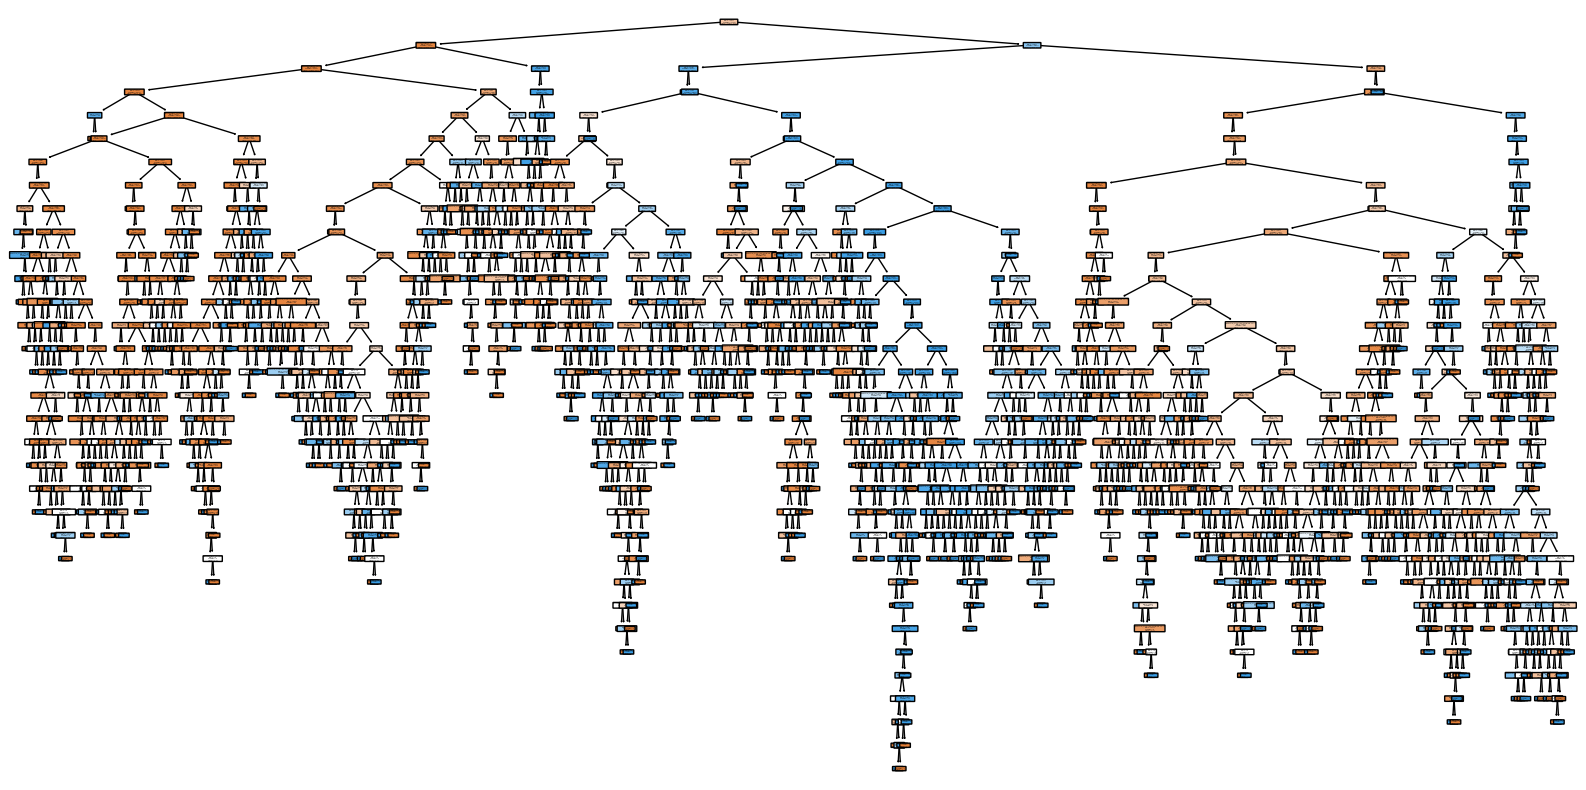

In [ ]:
plt.figure(figsize = (20,10))
decision_tree = plot_tree(decision_tree=dtc, 
                          feature_names = dataset.columns, 
                          filled = True , 
                          precision = 4, 
                          rounded = True)

In [ ]:
np.isnan(X_test.any()) #and gets False

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Arrival Delay in Minutes             False
dtype: bool

## K-Vizinhos

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

knc_pred = knc.predict(X_test)
knc_proba = knc.predict_proba(X_test)

knc_result = balanced_accuracy_score(y_test, knc_pred)
print(knc_result)
scores_list.append(knc_result)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Naive Bayes Muiltinomial

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb_pred = mnb.predict(X_test)
mnb_proba = mnb.predict_proba(X_test)

mnb_result = balanced_accuracy_score(y_test, mnb_pred)
print(mnb_result)
scores_list.append(mnb_result)

0.5987941730594551


## Perceptron Multicamadas

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)

mlp_result = balanced_accuracy_score(y_test, mlp_pred)
print(mlp_result)
scores_list.append(mlp_result)

0.8528914860401644


## Máquina de Vetores de Suporte
(demora quase duas horas pra rodar)

In [ ]:
""" svc = SVC(probability=True)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)

balanced_accuracy_score(y_test, svc_pred) """

' svc = SVC(probability=True)\nsvc.fit(X_train, y_train)\n\nsvc_pred = svc.predict(X_test)\nsvc_proba = svc.predict_proba(X_test)\n\nbalanced_accuracy_score(y_test, svc_pred) '

### Rede Neural

In [ ]:
# Convertendo de numpy para tensor
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train.squeeze()).type(torch.LongTensor)
y_test = torch.from_numpy(y_test.squeeze()).type(torch.LongTensor)


device = ("cuda" if torch.cuda.is_available() else "cpu")


ModuleNotFoundError: No module named 'torch'

In [ ]:
class RedeNeuralArtificial(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(RedeNeuralArtificial, self).__init__()
        self.input = nn.Linear(input_num, hidden_num)
        self.hidden = nn.Linear(hidden_num, hidden_num) # Camada oculta
        self.output = nn.Linear(hidden_num, output_num) # Camada de saída
        self.sigmoid = nn.Sigmoid() # Função de ativação sigmoid
        self.relu = nn.ReLU() # Função de ativação ReLU
    
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden(x))
        return self.output(x)
    
    def predict(self, x):
        # Aplicando a função de ativação sigmoid
        predictions = self.sigmoid(self.forward(x))
        result = []
        # Selecionando a classe com maior probabilidade
        for current_value in predictions:
            if current_value[0] > current_value[1]:
                result.append(0)
            else:
                result.append(1)
        return result

In [ ]:
input_num = 2
hidden_num = 4
output_num = 2  #A dimensionalidade da saída é igual ao número de classes

rna = RedeNeuralArtificial(input_num, hidden_num, output_num)
rna.to(device)
print(rna)

In [ ]:
# Definindo a função de perda e o otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rna.parameters(), lr = 0.01)

In [ ]:
# Transfere os dados para a GPU, caso disponível
if torch.cuda.is_available():
    X_train = Variable(X_train).cuda()
    y_train = Variable(y_train).cuda()
    X_test = Variable(X_test).cuda()
    y_test = Variable(y_test).cuda()

num_epochs = 1000 # Numero de épocas

for epoch in range(num_epochs):
    # forward propagation
    y_pred = rna(X_train)
    loss = criterion(y_pred, y_train)
    
    # back propagation
    optimizer.zero_grad() # Zera os gradientes para evitar acumulação
    loss.backward() # Calcula os gradientes
    optimizer.step() # Atualiza os pesos
    
    if epoch % 200 == 0:
        print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch, num_epochs, loss.item()))
print('\nTraining Complete')

In [ ]:
rna_pred = rna.predict(X_test)

X_test = X_test.cpu().numpy() # Converte o tensor para numpy
y_test = y_test.cpu().numpy()
rna_pred = np.array(rna_pred) # Converte a lista para numpy

print(classification_report(rna_pred, y_test))

## Combinação

(ainda sem os resultados do svc, mas a diferença é pequena)

### Votação majoritária

In [ ]:
voting_pred = mode(np.vstack( [dtc_pred, knc_pred, mnb_pred, mlp_pred, rna_pred] ) )

voting_results = balanced_accuracy_score(y_test, voting_pred[0][0])
print(voting_results)
scores_list.append(voting_results)

0.8589547291746886


### Probabilidades

In [ ]:
sum_proba = dtc_proba + knc_proba + mnb_proba + mlp_proba + rna_pred

prob_results = balanced_accuracy_score(y_test, np.argmax(sum_proba, axis=1))
print(prob_results)
scores_list.append(prob_results)

0.9171918405337659


## Plot dos resultados

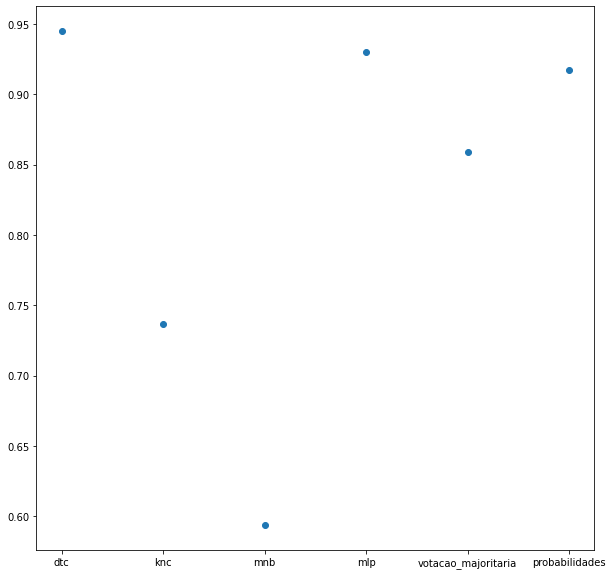

In [ ]:
x_labels = ['dtc', 'knc', 'mnb', 'mlp', 'rna_pred', 'votacao_majoritaria', 'probabilidades']
plt.figure(figsize=(10,10))
plt.plot(x_labels, scores_list, 'o')

## Voting Classifier
(refaz todo o código de uma vez só)

In [ ]:
comite = VotingClassifier(estimators=[('dtc', dtc), ('knc', knc), ('mnb', mnb), ('mlp', mlp), ('rna', rna)], voting='soft')

comite.fit(X_train, y_train)
comite_pred = comite.predict(X_test)

balanced_accuracy_score(y_test, comite_pred)

0.8938218810151428